# Project 2021
## Raul Sainz
#### MSc in Data Analytics 2021 
#### National College of Ireland 
#### Dublin, Ireland 
#### x19158696@student.ncirl.ie
#### Module: Database and Analytics Programming (H9DAP)
#### Lecturer: Athanasios Staikopoulos


## DataSet01
#### Description:
The cvs file contains data from  Mexican National Institute of Statistics and Geography **(INEGI)** regarding registered deaths (**general mortality**) in Mexico.
<br>Period: 2019
<br> Source: http://en.www.inegi.org.mx/servicios/datosabiertos.html

**Because of the large amount of data in the dataset and the limited space in the free tier of mongo DB the data will be reduced (randomly sampled) to 20% **



## Database for pre-processing DB1
<br>DB Engine: Mongo DB Atlas
<br>Region: AZURE Ireland (northeurope)
<br>Version 4.4.4
<br> Cluster name: ClusterDAP
<br>Tier: M0 Sandbox (General)
<br> vCPU: Shared
<br> RAM: Shared
<br> Storage: 512 MB

In [1]:
#Allows to reload custom module modifications
%load_ext autoreload
%autoreload 2

In [2]:
#Import libraries
import pandas as pd
#Imports custom functions from 'mypackage'
from  mypackage import functions  # Custom  misc functions
from  mypackage import mongo      # Custom functions for MongoDB
from  mypackage import postgresql # Custom functions for PostgreSQL

/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
#Setup pandas display parameters
pd.options.display.max_columns = 50 #Set pandas to display up to 50 columns in dataset
pd.options.display.max_rows = 200
pd.options.display.max_colwidth= 100
pd.options.display.precision = 3

## Exporting CSV file to Mongo DB

In [4]:
csvfile = "../Datasets/DS01-Mexico/mex_mort_data_2019_sampled.csv" #file name of the csv containing dataset
dbname = 'Dataset01' #Name of the database to store the data
collname = 'mex_mort_raw' #Name of the collection to store the data
sample_size = 0.7

In [5]:
# Print the Selected DB and Collection status
mongo.getDBStatistics(dbname)

[04/26/2021-17:10:18]: NOTICE: Database:   Dataset01  
			       Objects:    10,469 
			       Collectons: 1 
			       Size:       3,163.45 (0.6%)


In [6]:
#Run this cell only to drop the previously loaded data to start fresh
mongo_df = mongo.dropCollection(dbname,collname)

[04/26/2021-17:10:19]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:19]: Droping collection: mex_mort_raw ...
[04/26/2021-17:10:19]: OK: Finished droped mex_mort_raw collection.
[04/26/2021-17:10:19]: NOTICE: Database:   Dataset01  
			       Objects:    0 
			       Collectons: 0 
			       Size:       0.00 (0.0%)


In [7]:
try:
    mongo.uploadCSV(fileName = csvfile,dbname = dbname,collection = collname,samplesize = sample_size, batchSize = 2000)
except Exception as e:
    functions.logMessage(str(e),2)

[04/26/2021-17:10:19]: Loading file '../Datasets/DS01-Mexico/mex_mort_data_2019_sampled.csv' into memory...
[04/26/2021-17:10:19]: OK: File ../Datasets/DS01-Mexico/mex_mort_data_2019_sampled.csv succesfuly loaded: 14956 registries
[04/26/2021-17:10:19]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:19]: OK: Sampling file at 70.0%  loaded 10469 registries
[04/26/2021-17:10:19]: (1/6) Inserting records 0 to 2000...
[04/26/2021-17:10:21]: OK: (1/6) Inserted 2000 records.
[04/26/2021-17:10:21]: (2/6) Inserting records 2000 to 4000...
[04/26/2021-17:10:23]: OK: (2/6) Inserted 2000 records.
[04/26/2021-17:10:23]: (3/6) Inserting records 4000 to 6000...
[04/26/2021-17:10:26]: OK: (3/6) Inserted 2000 records.
[04/26/2021-17:10:26]: (4/6) Inserting records 6000 to 8000...
[04/26/2021-17:10:28]: OK: (4/6) Inserted 2000 records.
[04/26/2021-17:10:28]: (5/6) Inserting records 8000 to 10000...
[04/26/2021-17:10:30]: OK: (5/6) Inserted 2000 records.
[04/26/2021-17:10:30]: (6/6) Inserting re

## Importing Information from Mongo DB for pre-processing

In [8]:
#Import all the records from a collection into a pandas data frame
df_mongo = mongo.getCollectionDF(dbname,collname)
df_mongo.head()

[04/26/2021-17:10:30]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:30]: Query collection: mex_mort_raw ...
[04/26/2021-17:10:35]: OK: Fount 10469 files
[04/26/2021-17:10:35]: Closing DB connection...
[04/26/2021-17:10:35]: deleting temp dataframe...


,_id,Unnamed: 0,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,lista_mex,sexo,edad,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,...,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,vio_fami,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,6086e5eb9a3528d53593bb7f,560815,22,14,22,11,4,32,22,14,15,1,I613,30B,1,4063,26,1,2019,26,1,2019,18,10,1955,...,2,8,8,7,30,9,7,69,30,8,1,17,8,26,1,2019,NaN,2,1,88,88,888,8888,0,999
1,6086e5eb9a3528d53593bb80,244882,12,45,99,999,99,9999,99,999,99,9999,E117,20D,2,4057,24,1,2019,29,1,2019,12,7,1961,...,7,8,8,5,38,4,2,52,20,8,9,16,8,29,1,2019,NaN,2,2,88,88,888,8888,0,999
2,6086e5eb9a3528d53593bb81,84080,7,86,7,86,7,1,7,101,15,1,A972,06G,2,4004,15,8,2019,15,8,2019,14,12,2014,...,7,8,8,6,25,1,10,17,06,8,1,5,8,15,8,2019,NaN,2,8,88,88,888,8888,0,999
3,6086e5eb9a3528d53593bb82,640003,28,27,28,27,14,1,28,27,14,1,I219,28A,1,4068,19,6,2019,19,6,2019,99,99,9999,...,99,8,8,0,0,9,4,67,28,8,1,18,8,19,6,2019,NaN,9,1,88,88,888,8888,0,999
4,6086e5eb9a3528d53593bb83,226346,11,14,11,14,1,266,11,14,11,1,I64X,30D,1,4079,24,1,2019,25,1,2019,25,6,1939,...,99,8,8,11,20,9,7,69,30,8,2,20,8,24,1,2019,NaN,2,1,88,88,888,8888,0,999


After importing the data RAW unprocessed from mongo, 

In [9]:
pd.DataFrame({
                'unicos':df_mongo.nunique(),
                'missing total': df_mongo.isna().sum(),
              'missing %': df_mongo.isna().sum()/df_mongo.count(),
              'tipo':df_mongo.dtypes})

,unicos,missing total,missing %,tipo
_id,10469,0,0.000,object
Unnamed: 0,7468,0,0.000,int64
ent_regis,32,0,0.000,int64
mun_regis,267,0,0.000,int64
ent_resid,36,0,0.000,int64
mun_resid,294,0,0.000,int64
tloc_resid,18,0,0.000,int64
loc_resid,270,0,0.000,int64
ent_ocurr,33,0,0.000,int64
mun_ocurr,278,0,0.000,int64


In [10]:
print("Number of Columns: {} - Number of Rows: {}".format(df_mongo.shape[1],df_mongo.shape[0]))
print(df_mongo.columns)

Number of Columns: 61 - Number of Rows: 10469
Index(['_id', 'Unnamed: 0', 'ent_regis', 'mun_regis', 'ent_resid', 'mun_resid',
       'tloc_resid', 'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr',
       'loc_ocurr', 'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr',
       'mes_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis',
       'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida',
       'edo_civil', 'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia',
       'asist_medi', 'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab',
       'embarazo', 'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo',
       'lista1', 'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax'],
      dtype='object')


Selecting only columns relevant to our project reaearch from Original CSV

In [11]:
#Select relevant columns
relevant_columns = {'_id',        # ID column in mongo, cannot be unset
                    'ent_ocurr',  # State of death
                    'capitulo',   # cause of death (CIE Chapter)
                    'grupo',      # cause of death (CIE Group)
                    #'lista1',     # cause of death (Mexican list group)
                    'causa_def',  # cause of death (detailed list IDC)
                    'sexo',       # Gendre
                    'mes_ocurr',  # Month of death
                    'ocupacion',  # Employment
                    'escolarida', # Educational Level
                    'edo_civil',  # Marital Status
                    'presunto',   # Type of death
                    'ocurr_trab', # Death occured during work
                    'sitio_ocur', # Place of death
                    'nacionalid', # Nationality
                    'embarazo',   # Pregnant
                    'edad_agru',  # Age Group
                    }



Loop trough columns in data set and unset/drop the non-relevant columns from Mongo DB.

In [12]:
 non_relenant_columns = {} # create empty dictionary with non relevant columns
 for col in df_mongo.columns: # loop trough the columns in the data frame
     if col not in relevant_columns: # column is in relevant variable
         non_relenant_columns[col]  = '' # add variable to non relevant var to ve deleted from mongo collection
# delete columns from collection
collection = mongo.getMongoCollection(dbname,collname) # Get mongo collection to perform operations
collection.update_many({}, { "$unset":  non_relenant_columns  }) # Detete non relevant columns from Mongo DB collection
mongo.getDBStatistics(dbname)

[04/26/2021-17:10:39]: NOTICE: Database:   Dataset01  
			       Objects:    10,469 
			       Collectons: 1 
			       Size:       2,494.57 (0.5%)


In [13]:
#Checking for distinc and unique values
df_mongo = mongo.getCollectionDF(dbname,collname)#Import all the records from a collection into a pandas data frame
pd.DataFrame({
                'unicos':df_mongo.nunique(),
                'missing total': df_mongo.isna().sum(),
              'missing %': df_mongo.isna().sum()/df_mongo.count(),
              'tipo':df_mongo.dtypes})

[04/26/2021-17:10:39]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:39]: Query collection: mex_mort_raw ...
[04/26/2021-17:10:39]: OK: Fount 10469 files
[04/26/2021-17:10:40]: Closing DB connection...
[04/26/2021-17:10:40]: deleting temp dataframe...


,unicos,missing total,missing %,tipo
_id,10469,0,0.0,object
ent_ocurr,33,0,0.0,int64
causa_def,863,0,0.0,object
sexo,3,0,0.0,int64
mes_ocurr,13,0,0.0,int64
ocupacion,13,0,0.0,int64
escolarida,12,0,0.0,int64
edo_civil,8,0,0.0,int64
presunto,5,0,0.0,int64
ocurr_trab,4,0,0.0,int64


# Fotmat and Clean Data on Mongo DB 
Replace columns keys for 'readable' values contained on dataset package catalogs, this values where extracted from additional files provideds qith the data set according to  the file "diccionario_datos_defunciones_registradas_2019.csv" that contains the data dictionary and the corresponding value catalog.

In [14]:
#Transform Month
column_rep = {
    'old':'mes_ocurr',
    'new':'month',
    'vals': {
                    1:'Jan',
                    2:'Feb',
                    3:'Mar',
                    4:'Apr',
                    5:'May',
                    6:'Jun',
                    7:'Jul',
                    8:'Aug',
                    9:'Sep',
                    10:'Oct',
                    11:'Nov',
                    12:'Dec',
                    99:'NA'
                    }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:10:40]: NOTICE: Performing: 13 replacements
[04/26/2021-17:10:40]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:40]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:40]: OK: column mes_ocurr = 1 -> month = Jan -- 1020
[04/26/2021-17:10:41]: OK: column mes_ocurr = 2 -> month = Feb -- 850
[04/26/2021-17:10:41]: OK: column mes_ocurr = 3 -> month = Mar -- 853
[04/26/2021-17:10:41]: OK: column mes_ocurr = 4 -> month = Apr -- 825
[04/26/2021-17:10:41]: OK: column mes_ocurr = 5 -> month = May -- 822
[04/26/2021-17:10:42]: OK: column mes_ocurr = 6 -> month = Jun -- 788
[04/26/2021-17:10:42]: OK: column mes_ocurr = 7 -> month = Jul -- 787
[04/26/2021-17:10:42]: OK: column mes_ocurr = 8 -> month = Aug -- 813
[04/26/2021-17:10:42]: OK: column mes_ocurr = 9 -> month = Sep -- 823
[04/26/2021-17:10:43]: OK: column mes_ocurr = 10 -> month = Oct -- 911
[04/26/2021-17:10:43]: OK: column mes_ocurr = 11 -> month = Nov -- 900
[04/26/2021-17:10:43]: OK: column mes_ocurr = 1

In [15]:
'''
#Transform Age group column
column_rep = {
    'old':'edad_agru',
    'new':'age_group',
    'vals': {
                1: 'Months',
                2: '1 year',
                3: '2 years',
                4: '3 years',
                5: '4 years',
                6: '5 to 9 years',
                7: '10 to 14 years',
                8: '15 to 19 years',
                9: '20 to 24 years',
                10: '25 to 29 years',
                11: '30 to 34 years',
                12: '35 to 39 years',
                13: '40 to 44 years',
                14: '45 to 49 years',
                15: '50 to 54 years',
                16: '55 to 59 years',
                17: '60 to 64 years',
                18: '65 to 69 years',
                19: '70 to 74 years',
                20: '75 to 79 years',
                21: '80 to 84 years',
                22: '85 to 89 years',
                23: '90 to 94 years',
                24: '95 to 99 years',
                25: '100 a 104 years',
                26: '105 a 109 years',
                27: '110 a 114 years',
                28: '115 a 119 years',
                29: '120 years',
                30: 'Unknown'
                    }
}
mongo.replaceColumn(dbname,collname,column_rep)
'''

"\n#Transform Age group column\ncolumn_rep = {\n    'old':'edad_agru',\n    'new':'age_group',\n    'vals': {\n                1: 'Months',\n                2: '1 year',\n                3: '2 years',\n                4: '3 years',\n                5: '4 years',\n                6: '5 to 9 years',\n                7: '10 to 14 years',\n                8: '15 to 19 years',\n                9: '20 to 24 years',\n                10: '25 to 29 years',\n                11: '30 to 34 years',\n                12: '35 to 39 years',\n                13: '40 to 44 years',\n                14: '45 to 49 years',\n                15: '50 to 54 years',\n                16: '55 to 59 years',\n                17: '60 to 64 years',\n                18: '65 to 69 years',\n                19: '70 to 74 years',\n                20: '75 to 79 years',\n                21: '80 to 84 years',\n                22: '85 to 89 years',\n                23: '90 to 94 years',\n                24: '95 to 99 years',\n 

In [16]:

#Transform Age group column
column_rep = {
    'old':'edad_agru',
    'new':'age_group',
    'vals': {
                1: 'Under 1 year',
                2: '1-4 years',
                3: '1-4 years',
                4: '1-4 years',
                5: '1-4 years',
                6: '5-14 years',
                7: '5-14 years',
                8: '15-24 years',
                9: '15-24 years',
                10: '25-34 years',
                11: '25-34 years',
                12: '35-44 years',
                13: '35-44 years',
                14: '45-54 years',
                15: '45-54 years',
                16: '55-64 years',
                17: '55-64 years',
                18: '65-74 years',
                19: '65-74 years',
                20: '75-84 years',
                21: '75-84 years',
                22: '85 years and over',
                23: '85 years and over',
                24: '85 years and over',
                25: '85 years and over',
                26: '85 years and over',
                27: '85 years and over',
                28: '85 years and over',
                29: '85 years and over',
                30: 'Age not stated'
                    }
}
mongo.replaceColumn(dbname,collname,column_rep)


[04/26/2021-17:10:43]: NOTICE: Performing: 30 replacements
[04/26/2021-17:10:43]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:43]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:44]: OK: column edad_agru = 1 -> age_group = Under 1 year -- 328
[04/26/2021-17:10:44]: OK: column edad_agru = 2 -> age_group = 1-4 years -- 29
[04/26/2021-17:10:44]: OK: column edad_agru = 3 -> age_group = 1-4 years -- 16
[04/26/2021-17:10:44]: OK: column edad_agru = 4 -> age_group = 1-4 years -- 11
[04/26/2021-17:10:44]: OK: column edad_agru = 5 -> age_group = 1-4 years -- 10
[04/26/2021-17:10:44]: OK: column edad_agru = 6 -> age_group = 5-14 years -- 37
[04/26/2021-17:10:44]: OK: column edad_agru = 7 -> age_group = 5-14 years -- 43
[04/26/2021-17:10:44]: OK: column edad_agru = 8 -> age_group = 15-24 years -- 119
[04/26/2021-17:10:44]: OK: column edad_agru = 9 -> age_group = 15-24 years -- 227
[04/26/2021-17:10:44]: OK: column edad_agru = 10 -> age_group = 25-34 years -- 236
[04/26/2021-17

In [17]:
# Fix education values
column_rep = {
    'old':'escolarida',
    'new':'education',
    'vals': {
                1:'None',
                2:'Preschool',
                3:'Elementary',
                4:'Elementary',
                5:'Middle school',
                6:'Middle school',
                7:'High school',
                8:'High school',
                9:'College',
                10:'Postgraduate',
                88:'NA',
                99:'Unknown',
            }
}
mongo.replaceColumn(dbname,collname,column_rep)


[04/26/2021-17:10:48]: NOTICE: Performing: 12 replacements
[04/26/2021-17:10:48]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:48]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:49]: OK: column escolarida = 1 -> education = None -- 1854
[04/26/2021-17:10:49]: OK: column escolarida = 2 -> education = Preschool -- 30
[04/26/2021-17:10:49]: OK: column escolarida = 3 -> education = Elementary -- 2308
[04/26/2021-17:10:50]: OK: column escolarida = 4 -> education = Elementary -- 2273
[04/26/2021-17:10:50]: OK: column escolarida = 5 -> education = Middle school -- 252
[04/26/2021-17:10:51]: OK: column escolarida = 6 -> education = Middle school -- 1170
[04/26/2021-17:10:51]: OK: column escolarida = 7 -> education = High school -- 177
[04/26/2021-17:10:51]: OK: column escolarida = 8 -> education = High school -- 623
[04/26/2021-17:10:51]: OK: column escolarida = 9 -> education = College -- 855
[04/26/2021-17:10:51]: OK: column escolarida = 10 -> education = Postgraduate -- 

In [18]:
# Search for all the registryes on mongo with edication level as NA (Not Aplicale)
results = list(collection.find({'escolarida':88}))
data = pd.DataFrame(results)
print(data.shape)
data.head()

(373, 19)


,_id,ent_ocurr,causa_def,sexo,mes_ocurr,ocupacion,escolarida,edo_civil,presunto,ocurr_trab,sitio_ocur,nacionalid,embarazo,capitulo,grupo,edad_agru,month,age_group,education
0,6086e5eb9a3528d53593bb88,15,K920,2,8,97,88,8,8,8,1,1,8,11,10,3,Aug,1-4 years,NA
1,6086e5eb9a3528d53593bb89,14,P369,2,1,97,88,8,8,8,1,1,8,16,5,1,Jan,Under 1 year,NA
2,6086e5eb9a3528d53593bb93,21,Q059,2,4,97,88,8,8,8,11,1,8,17,1,1,Apr,Under 1 year,NA
3,6086e5eb9a3528d53593bbd8,9,Q226,2,4,97,88,8,8,8,3,1,8,17,3,2,Apr,1-4 years,NA
4,6086e5eb9a3528d53593bc0e,11,J189,1,4,97,88,8,8,8,3,1,8,10,2,1,Apr,Under 1 year,NA


In [19]:
#Transform employement
column_rep = {
    'old':'ocupacion',
    'new':'employement',
    'vals': {
                1:'manager',
                2:'technician',
                3:'employee',
                4:'sales',
                5:'security',
                6:'farmer',
                7:'artist',
                8:'driver',
                9:'employee',
                10:'unemployed',
                11:'unemployed',
                97:'NA',
                98:'unknown',
                99:'unknown',
            }
}
mongo.replaceColumn(dbname,collname,column_rep)


[04/26/2021-17:10:52]: NOTICE: Performing: 14 replacements
[04/26/2021-17:10:52]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:52]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:52]: OK: column ocupacion = 1 -> employement = manager -- 26
[04/26/2021-17:10:52]: OK: column ocupacion = 2 -> employement = technician -- 430
[04/26/2021-17:10:52]: OK: column ocupacion = 3 -> employement = employee -- 64
[04/26/2021-17:10:52]: OK: column ocupacion = 4 -> employement = sales -- 541
[04/26/2021-17:10:53]: OK: column ocupacion = 5 -> employement = security -- 139
[04/26/2021-17:10:53]: OK: column ocupacion = 6 -> employement = farmer -- 1111
[04/26/2021-17:10:53]: OK: column ocupacion = 7 -> employement = artist -- 668
[04/26/2021-17:10:53]: OK: column ocupacion = 8 -> employement = driver -- 240
[04/26/2021-17:10:53]: OK: column ocupacion = 9 -> employement = employee -- 298
[04/26/2021-17:10:53]: NOTICE: No documents found for ocupacion = 10 -> employement = unemployed
[04

In [20]:
#Transform marital status
column_rep = {
    'old':'edo_civil',
    'new':'marital',
    'vals': 
            { 
            1:'single',
            2:'divorced',
            3:'widowed',
            4:'partnership',
            5:'married',
            6:'divorced',
            8:'NA',
            9:'unknown'
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:10:55]: NOTICE: Performing: 8 replacements
[04/26/2021-17:10:55]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:55]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:56]: OK: column edo_civil = 1 -> marital = single -- 2072
[04/26/2021-17:10:56]: OK: column edo_civil = 2 -> marital = divorced -- 177
[04/26/2021-17:10:57]: OK: column edo_civil = 3 -> marital = widowed -- 2275
[04/26/2021-17:10:57]: OK: column edo_civil = 4 -> marital = partnership -- 928
[04/26/2021-17:10:58]: OK: column edo_civil = 5 -> marital = married -- 3822
[04/26/2021-17:10:58]: OK: column edo_civil = 6 -> marital = divorced -- 155
[04/26/2021-17:10:59]: OK: column edo_civil = 8 -> marital = NA -- 448
[04/26/2021-17:10:59]: OK: column edo_civil = 9 -> marital = unknown -- 592
[04/26/2021-17:10:59]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:10:59]: Closing DB connection...


### The states of Mexico are first-level administrative territorial entities of the country of Mexico (officially is named United Mexican States). 
### There are 32 federal entities in Mexico (31 states and the capital, Mexico City (CDMX), as a separate entity without being formally a state)
### The list of states and the corresponding 3 digit code is provided in file state-codes.csv extracted from wikipedia site:
<img src="mex-map.jpg">

In [21]:
# Import State names catalog feom CSV to rename values
df_states = pd.read_csv("../Datasets/DS01-Mexico/catalogs/state-codes.csv")
df_states = df_states.set_index('Id') #Set the index of the data frame to column Id
state_dict = df_states[['Code']].to_dict() #Transform data frame into dictionary format
print(state_dict['Code']) #Print dictionary of values

{1: 'AGU', 2: 'BCN', 3: 'BCS', 4: 'CAM', 7: 'CHP', 8: 'CHH', 9: 'CDMX', 5: 'COA', 6: 'COL', 10: 'DUR', 11: 'GUA', 12: 'GRO', 13: 'HID', 14: 'JAL', 15: 'MEX', 16: 'MIC', 17: 'MOR', 18: 'NAY', 19: 'NLE', 20: 'OAX', 21: 'PUE', 22: 'QUE', 23: 'ROO', 24: 'SLP', 25: 'SIN', 26: 'SON', 27: 'TAB', 28: 'TAM', 29: 'TLA', 30: 'VER', 31: 'YUC', 32: 'ZAC', 33: 'USA', 34: 'LAT', 35: 'WLD', 88: 'NAP', 99: 'UNK'}


In [22]:
# Replace values for state of death
column_rep = {
    'old':'ent_ocurr',
    'new':'state_death',
    'vals':state_dict['Code']
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:10:59]: NOTICE: Performing: 37 replacements
[04/26/2021-17:10:59]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:10:59]: Updating collection: mex_mort_raw ...
[04/26/2021-17:10:59]: OK: column ent_ocurr = 1 -> state_death = AGU -- 103
[04/26/2021-17:10:59]: OK: column ent_ocurr = 2 -> state_death = BCN -- 325
[04/26/2021-17:10:59]: OK: column ent_ocurr = 3 -> state_death = BCS -- 37
[04/26/2021-17:10:59]: OK: column ent_ocurr = 4 -> state_death = CAM -- 93
[04/26/2021-17:11:00]: OK: column ent_ocurr = 7 -> state_death = CHP -- 427
[04/26/2021-17:11:00]: OK: column ent_ocurr = 8 -> state_death = CHH -- 349
[04/26/2021-17:11:00]: OK: column ent_ocurr = 9 -> state_death = CDMX -- 1042
[04/26/2021-17:11:00]: OK: column ent_ocurr = 5 -> state_death = COA -- 260
[04/26/2021-17:11:00]: OK: column ent_ocurr = 6 -> state_death = COL -- 65
[04/26/2021-17:11:00]: OK: column ent_ocurr = 10 -> state_death = DUR -- 146
[04/26/2021-17:11:00]: OK: column ent_ocurr = 11 -> state_de

In [23]:
#Transform Type of Death
column_rep = {
    'old':'presunto',
    'new':'type_death',
    'vals': 
            { 
                    1:'accident',
                    2:'homicide',
                    3:'suicide',
                    4:'unknown',
                    5:'law/war',
                    8:'natural'
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:04]: NOTICE: Performing: 6 replacements
[04/26/2021-17:11:04]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:04]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:04]: OK: column presunto = 1 -> type_death = accident -- 417
[04/26/2021-17:11:05]: OK: column presunto = 2 -> type_death = homicide -- 549
[04/26/2021-17:11:05]: OK: column presunto = 3 -> type_death = suicide -- 114
[04/26/2021-17:11:05]: OK: column presunto = 4 -> type_death = unknown -- 71
[04/26/2021-17:11:05]: NOTICE: No documents found for presunto = 5 -> type_death = law/war
[04/26/2021-17:11:07]: OK: column presunto = 8 -> type_death = natural -- 9318
[04/26/2021-17:11:07]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:07]: Closing DB connection...


In [24]:
column_rep = {
    'old':'sexo',
    'new':'sex',
    'vals':{
                    1:'male', #Male
                    2:'female', #Female
                    9:'unknown' # Unknown - Set value to true to get reduce NA Values
    }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:07]: NOTICE: Performing: 3 replacements
[04/26/2021-17:11:07]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:07]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:09]: OK: column sexo = 1 -> sex = male -- 5928
[04/26/2021-17:11:10]: OK: column sexo = 2 -> sex = female -- 4537
[04/26/2021-17:11:10]: OK: column sexo = 9 -> sex = unknown -- 4
[04/26/2021-17:11:10]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:10]: Closing DB connection...


In [25]:
column_rep = {
    'old':'sexo',
    'new':'is_male',
    'vals':{
                    1:True, #Male
                    2:False, #Female
                    9:True # Unknown - Set value to true to get reduce NA Values
    }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:10]: NOTICE: Performing: 3 replacements
[04/26/2021-17:11:10]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:10]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:13]: OK: column sexo = 1 -> is_male = True -- 5928
[04/26/2021-17:11:14]: OK: column sexo = 2 -> is_male = False -- 4537
[04/26/2021-17:11:14]: OK: column sexo = 9 -> is_male = True -- 4
[04/26/2021-17:11:14]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:14]: Closing DB connection...


In [26]:
#Transform work related death
column_rep = {
    'old':'ocurr_trab',
    'new':'is_work_related',
    'vals': 
            { 
                1:True, #Yes
                2:False, #No
                8:False, #Natural death
                9:False  #Unknown
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:14]: NOTICE: Performing: 4 replacements
[04/26/2021-17:11:14]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:14]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:14]: OK: column ocurr_trab = 1 -> is_work_related = True -- 97
[04/26/2021-17:11:15]: OK: column ocurr_trab = 2 -> is_work_related = False -- 547
[04/26/2021-17:11:16]: OK: column ocurr_trab = 8 -> is_work_related = False -- 9348
[04/26/2021-17:11:17]: OK: column ocurr_trab = 9 -> is_work_related = False -- 477
[04/26/2021-17:11:17]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:17]: Closing DB connection...


In [27]:
#Transform Nationality column
column_rep = {
    'old':'nacionalid',
    'new':'is_foreign',
    'vals': 
            { 
                    1:False,# is from mexico
                    2:True, # is forgein
                    9:False # unknown
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:17]: NOTICE: Performing: 3 replacements
[04/26/2021-17:11:17]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:17]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:19]: OK: column nacionalid = 1 -> is_foreign = False -- 10299
[04/26/2021-17:11:19]: OK: column nacionalid = 2 -> is_foreign = True -- 61
[04/26/2021-17:11:19]: OK: column nacionalid = 9 -> is_foreign = False -- 109
[04/26/2021-17:11:19]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:19]: Closing DB connection...


In [28]:
#Transform Pregnant column
column_rep = {
    'old':'embarazo',
    'new':'is_pregnant',
    'vals': 
            { 
                    1:True,#died during pregnant
                    2:True,#died during labor
                    3:True,#died during Postpartum
                    4:True,#died whithin 1 year after giving birth
                    5:False,#No pregnancy whithin 11 month previous to death
                    6:False,#pregnant 1 year or more before death
                    8:False,#Not aplicable
                    9:False,#Unknown
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:19]: NOTICE: Performing: 8 replacements
[04/26/2021-17:11:19]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:19]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:20]: OK: column embarazo = 1 -> is_pregnant = True -- 1
[04/26/2021-17:11:20]: NOTICE: No documents found for embarazo = 2 -> is_pregnant = True
[04/26/2021-17:11:20]: OK: column embarazo = 3 -> is_pregnant = True -- 9
[04/26/2021-17:11:20]: OK: column embarazo = 4 -> is_pregnant = True -- 6
[04/26/2021-17:11:20]: OK: column embarazo = 5 -> is_pregnant = False -- 292
[04/26/2021-17:11:20]: NOTICE: No documents found for embarazo = 6 -> is_pregnant = False
[04/26/2021-17:11:23]: OK: column embarazo = 8 -> is_pregnant = False -- 9721
[04/26/2021-17:11:23]: OK: column embarazo = 9 -> is_pregnant = False -- 440
[04/26/2021-17:11:23]: OK: Finished replacement 10469 rows processed.
[04/26/2021-17:11:23]: Closing DB connection...


In [29]:
#Transform place of death
column_rep = {
    'old':'sitio_ocur',
    'new':'place_death',
    'vals': 
            { 
                    1:'public hospital',
                    2:'public hospital',
                    3:'public hospital',
                    4:'public hospital',
                    5:'public hospital',
                    6:'army',
                    7:'army',
                    8:'public hospital',
                    9:'private hospital',
                    10:'street',
                    11:'home',
                    12:'other',
                    99:'unknown'
            }
}
mongo.replaceColumn(dbname,collname,column_rep)

[04/26/2021-17:11:23]: NOTICE: Performing: 13 replacements
[04/26/2021-17:11:23]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:23]: Updating collection: mex_mort_raw ...
[04/26/2021-17:11:24]: OK: column sitio_ocur = 1 -> place_death = public hospital -- 1441
[04/26/2021-17:11:24]: OK: column sitio_ocur = 2 -> place_death = public hospital -- 54
[04/26/2021-17:11:25]: OK: column sitio_ocur = 3 -> place_death = public hospital -- 1930
[04/26/2021-17:11:25]: OK: column sitio_ocur = 4 -> place_death = public hospital -- 419
[04/26/2021-17:11:25]: OK: column sitio_ocur = 5 -> place_death = public hospital -- 65
[04/26/2021-17:11:25]: OK: column sitio_ocur = 6 -> place_death = army -- 44
[04/26/2021-17:11:26]: OK: column sitio_ocur = 7 -> place_death = army -- 8
[04/26/2021-17:11:26]: OK: column sitio_ocur = 8 -> place_death = public hospital -- 189
[04/26/2021-17:11:26]: OK: column sitio_ocur = 9 -> place_death = private hospital -- 513
[04/26/2021-17:11:26]: OK: column sitio_ocu

### After al the original columns containign  key values have been replaced we drop them from MongoDB.
### From statistics qe can see the reductio of size in the DB 

In [30]:
#Drop replaced columns
replaced_columns = ['sexo','ent_ocurr','ocupacion','escolarida','edo_civil','ocurr_trab','embarazo','presunto','nacionalid','sitio_ocur','edad','mes_ocurr','edad_agru']
mongo.getDBStatistics(dbname) #Print DB collection statistics before the drop
collection = mongo.getMongoCollection(dbname,collname) # Get mongo collection to perform operations
for col in replaced_columns:
    collection.update_many({}, { "$unset": { col: "" } })
mongo.getDBStatistics(dbname) #Print DB collection statistics after the drop

[04/26/2021-17:11:28]: NOTICE: Database:   Dataset01  
			       Objects:    10,469 
			       Collectons: 1 
			       Size:       5,125.04 (1.0%)
[04/26/2021-17:11:55]: NOTICE: Database:   Dataset01  
			       Objects:    10,469 
			       Collectons: 1 
			       Size:       3,315.46 (0.6%)


# Construct and Integrate Data
Derived Attributes and Generated Records

## International Statistical Classification of Diseases and Related Health Problems (ICD)
ICD is the foundation for the identification of health trends and statistics globally, and the international standard for reporting diseases and health conditions. It is the diagnostic classification standard for all clinical and research purposes. ICD defines the universe of diseases, disorders, injuries and other related health conditions, listed in a comprehensive, hierarchical fashion that allows for:

In [31]:
#Import all the records from a Mongo DB collection into a pandas data frame
df_mongo = mongo.getCollectionDF(dbname,collname)
df_mongo.head()

[04/26/2021-17:11:55]: Connecting to mongo DB Dataset01 ...
[04/26/2021-17:11:55]: Query collection: mex_mort_raw ...
[04/26/2021-17:11:56]: OK: Fount 10469 files
[04/26/2021-17:11:56]: Closing DB connection...
[04/26/2021-17:11:56]: deleting temp dataframe...


,_id,causa_def,capitulo,grupo,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death
0,6086e5eb9a3528d53593bb7f,I613,9,7,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital
1,6086e5eb9a3528d53593bb80,E117,4,2,Jan,55-64 years,Elementary,unemployed,married,UNK,natural,female,False,False,False,False,home
2,6086e5eb9a3528d53593bb81,A972,1,10,Aug,1-4 years,None,NA,NA,CHP,natural,female,False,False,False,False,public hospital
3,6086e5eb9a3528d53593bb82,I219,9,4,Jun,65-74 years,Unknown,unknown,married,TAM,natural,male,True,False,False,False,unknown
4,6086e5eb9a3528d53593bb83,I64X,9,7,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital


In [32]:
df_mongo.rename(columns = {'causa_def':'icd10_code'}, inplace = True)

Columns causa_def a type of ICD code but with an additional digit corresponding to the detailed specification of the code.
For example: causa_def J159 corresponds to ICD10 code J15.9, in which J15 indicates "Bacterial pneumonia" and the .9 to "Unspecified bacterial pneumonia"
As of the scope of this ptoject we ar not interested on that level of derail se we will keep the general ICD code by removing the last code

In [33]:
# All values on the column contain 4 digits
df_mongo.icd10_code.str.len().value_counts()

4    10469
Name: icd10_code, dtype: int64

In [34]:
#removing the last digit from causa_def
df_mongo['icd10_code'] = df_mongo['icd10_code'].str[:-1]
df_mongo.head()

,_id,icd10_code,capitulo,grupo,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death
0,6086e5eb9a3528d53593bb7f,I61,9,7,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital
1,6086e5eb9a3528d53593bb80,E11,4,2,Jan,55-64 years,Elementary,unemployed,married,UNK,natural,female,False,False,False,False,home
2,6086e5eb9a3528d53593bb81,A97,1,10,Aug,1-4 years,None,NA,NA,CHP,natural,female,False,False,False,False,public hospital
3,6086e5eb9a3528d53593bb82,I21,9,4,Jun,65-74 years,Unknown,unknown,married,TAM,natural,male,True,False,False,False,unknown
4,6086e5eb9a3528d53593bb83,I64,9,7,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital


After the translation we can see the number of unique codes in or data set

In [35]:
len(df_mongo['icd10_code'].unique())

482

## Processing causes of death catalog description

Importing the file "capitulo_grupo.csv" ICD chapter and Group description of each cause of death code (spanish), the description contains in parentheses the ICD corresponding Group. 
The column Capitulo corresponds to the standar IDC format used to merge the datasets in the project.
'---'
<br>
### Steps:
- Extract the IDC Group from description using RegEx
- Use the extracted IDC code to extract the english description from WHO API
- Use the translated WHO description to extract more information from Wikipedia API
- Perform One-Hot encodign on the text based on defined category terms 


In [36]:
# Import Cause Of Death catalog from CSV , contains ICD code
df_icd_groups = pd.read_csv("../Datasets/DS01-Mexico/catalogs/capitulo_grupo.csv", encoding = 'utf-8')
df_icd_groups.dropna(inplace=True) #Drop rows with NA values because they do not contain idc code
df_icd_groups.rename(columns = {'CAP':'capitulo','GPO':'grupo'}, inplace = True) #Rename columns to match the main data frame

In [37]:
df_icd_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 249
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   capitulo  231 non-null    int64  
 1   grupo     231 non-null    float64
 2   DESCRIP   231 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
# Column "grupo" was imported as float64
df_icd_groups['grupo'] = df_icd_groups.grupo.astype(int) #Cast column grupo as int 
df_icd_groups.head()

,capitulo,grupo,DESCRIP
1,1,1,Enfermedades infecciosas intestinales (A00-A09)
2,1,2,Tuberculosis (A15-A19)
3,1,3,Ciertas zoonosis bacterianas (A20-A28)
4,1,4,Otras enfermedades bacterianas (A30-A49)
5,1,5,Infecciones con modo de transmisión predominantemente sexual (A50-A64)


In [39]:
#Checking for distinc and unique values
pd.DataFrame({
                'unicos':df_icd_groups.nunique(),
                'missing total': df_icd_groups.isna().sum(),
              'missing %': df_icd_groups.isna().sum()/df_icd_groups.count(),
              'tipo':df_icd_groups.dtypes})

,unicos,missing total,missing %,tipo
capitulo,20,0,0.0,int64
grupo,35,0,0.0,int64
DESCRIP,231,0,0.0,object


In [40]:
#Extract IDC10 code from description and saving into new column
df_icd_groups['icd10_group']=df_icd_groups['DESCRIP'].str.extract(r'([A-Z]\d{2}-[A-Z]\d{2}|[A-Z]\d{2})')
df_icd_groups.head() #Prind DF to reviee new column

,capitulo,grupo,DESCRIP,icd10_group
1,1,1,Enfermedades infecciosas intestinales (A00-A09),A00-A09
2,1,2,Tuberculosis (A15-A19),A15-A19
3,1,3,Ciertas zoonosis bacterianas (A20-A28),A20-A28
4,1,4,Otras enfermedades bacterianas (A30-A49),A30-A49
5,1,5,Infecciones con modo de transmisión predominantemente sexual (A50-A64),A50-A64


In [41]:
#Checking for NA values on new column
df_icd_groups[df_icd_groups.icd10_group.isna()]

,capitulo,grupo,DESCRIP,icd10_group


## WHO ICD API
CD API allows programmatic access to the International Classification of Diseases (ICD). 
<br>
It is an HTTP based REST API. You may use this site to access up to date documentation on using the API as well as managing the keys needed for using the API.
- Source: https://icd.who.int/icdapi
- Documentation: https://icd.who.int/icdapi/docs2/APIDoc-Version2/

In [42]:
#Get the WHO ICD10 group description
df_icd_groups['icd10_desc'] = df_icd_groups.icd10_group.apply(functions.getWHOInfo)

-A19"
[04/26/2021-17:11:59]: OK: title found for "A20-A28"
[04/26/2021-17:11:59]: OK: title found for "A30-A49"
[04/26/2021-17:11:59]: OK: title found for "A50-A64"
[04/26/2021-17:11:59]: OK: title found for "A65-A69"
[04/26/2021-17:11:59]: OK: title found for "A70-A74"
[04/26/2021-17:11:59]: OK: title found for "A75-A79"
[04/26/2021-17:11:59]: OK: title found for "A80-A89"
[04/26/2021-17:11:59]: ERROR: getWHOInfo: Expecting ',' delimiter: line 1 column 73 (char 72)
[04/26/2021-17:12:00]: OK: title found for "B00-B09"
[04/26/2021-17:12:00]: OK: title found for "B15-B19"
[04/26/2021-17:12:00]: OK: title found for "B20-B24"
[04/26/2021-17:12:00]: OK: title found for "B25-B34"
[04/26/2021-17:12:00]: OK: title found for "B35-B49"
[04/26/2021-17:12:00]: OK: title found for "B50-B64"
[04/26/2021-17:12:00]: OK: title found for "B65-B83"
[04/26/2021-17:12:00]: OK: title found for "B85-B89"
[04/26/2021-17:12:00]: OK: title found for "B90-B94"
[04/26/2021-17:12:00]: OK: title found for "B95-B98"

In [43]:
df_icd_groups.head()

,capitulo,grupo,DESCRIP,icd10_group,icd10_desc
1,1,1,Enfermedades infecciosas intestinales (A00-A09),A00-A09,intestinal infectious diseases
2,1,2,Tuberculosis (A15-A19),A15-A19,tuberculosis
3,1,3,Ciertas zoonosis bacterianas (A20-A28),A20-A28,certain zoonotic bacterial diseases
4,1,4,Otras enfermedades bacterianas (A30-A49),A30-A49,other bacterial diseases
5,1,5,Infecciones con modo de transmisión predominantemente sexual (A50-A64),A50-A64,infections with a predominantly sexual mode of transmission


## MediaWiki API (Wikipedia)
### To extend the information of the cause of death, the translated description will be inputed into the API from wikipedia
* Reference: https://www.mediawiki.org/wiki/API:Main_page

* The MediaWiki Action API is a web service that allows access to some wiki-features like authentication, page operations, and search. It can provide meta information about the wiki and the logged-in user.
API call and execurtion in myPackage.functions library function getWikipediaInfo()
#### Description
* search for wikipedia titles based on a search text
#### Parameters:
* @text str: text to be searches in Wikipedia
* @numChars int: Number of chrachters to be returned from wikipedia
#### Returns:
* first n charachers from the top 1 wikipedia title found 

In [44]:
#Extract Wikipedia information from ICD group description and saving into new column
df_icd_groups['wiki'] = df_icd_groups['icd10_desc'].apply(functions.getWikipediaInfo)

0mOK: found 208 hits for "schizophrenia, schizotypal and"
[04/26/2021-17:13:03]: OK: found 1572 hits for "mood [affective] disorders"
[04/26/2021-17:13:03]: OK: found 193 hits for "neurotic, stress-related and s"
[04/26/2021-17:13:04]: OK: found 195 hits for "behavioural syndromes associat"
[04/26/2021-17:13:05]: OK: found 985 hits for "disorders of adult personality"
[04/26/2021-17:13:07]: OK: found 1853 hits for "mental retardation"
[04/26/2021-17:13:10]: OK: found 6049 hits for "disorders of psychological dev"
[04/26/2021-17:13:11]: OK: found 98 hits for "behavioural and emotional diso"
[04/26/2021-17:13:11]: OK: found 531 hits for "mental disorder, not otherwise"
[04/26/2021-17:13:13]: OK: found 896 hits for "inflammatory diseases of the c"
[04/26/2021-17:13:13]: OK: found 62 hits for "systemic atrophies primarily a"
[04/26/2021-17:13:14]: OK: found 146 hits for "extrapyramidal and movement di"
[04/26/2021-17:13:14]: OK: found 320 hits for "other degenerative diseases of"
[04/26/20

In [45]:
df_icd_groups.head()

,capitulo,grupo,DESCRIP,icd10_group,icd10_desc,wiki
1,1,1,Enfermedades infecciosas intestinales (A00-A09),A00-A09,intestinal infectious diseases,Intestinal infectious diseases include a large number of infections of the bowels including: cho...
2,1,2,Tuberculosis (A15-A19),A15-A19,tuberculosis,Tuberculosis (TB) is an infectious disease usually caused by Mycobacterium tuberculosis (MTB) ba...
3,1,3,Ciertas zoonosis bacterianas (A20-A28),A20-A28,certain zoonotic bacterial diseases,"An infection is the invasion of an organism's body tissues by disease-causing agents, their mult..."
4,1,4,Otras enfermedades bacterianas (A30-A49),A30-A49,other bacterial diseases,"Bacteria ( (listen); common noun bacteria, singular bacterium) are a type of biological cell. Th..."
5,1,5,Infecciones con modo de transmisión predominantemente sexual (A50-A64),A50-A64,infections with a predominantly sexual mode of transmission,"Sexually transmitted infections (STIs), also referred to as sexually transmitted diseases (STDs)..."


## Wikipedia text Natural Language Processing using NLTK Library

In [46]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [47]:
# Set all text to lower
df_icd_groups['wiki'] = df_icd_groups['wiki'].str.lower()

In [48]:
#Remove punctuation signs and numbers
df_icd_groups['wiki'] = df_icd_groups['wiki'].str.replace('[{}]'.format(string.punctuation), '')
df_icd_groups['wiki'] = df_icd_groups['wiki'].str.replace('[0-9]'.format(string.punctuation), '') 

/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/raulsainz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# COnvert the text into tokens to be processed
df_icd_groups['wiki_tokens']  =  df_icd_groups['wiki'].apply(word_tokenize)

In [50]:
#Import stop words for English
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
df_icd_groups['wiki_tokens'] = df_icd_groups['wiki_tokens'].apply(lambda words: [word for word in words if word not in stop_words ])

### stemming is the process of removing a part of a word, or reducing a word to its stem or root.

In [52]:
# Stemming the tokens
stemmer = PorterStemmer()
df_icd_groups['wiki_steamed'] = df_icd_groups['wiki_tokens'].apply(lambda words: [stemmer.stem(word) for word in words])

In [53]:
#print desults of rown to confirm the new stemmed words
index = 5
print(df_icd_groups.wiki_tokens[index][:7])
print(df_icd_groups.wiki_steamed[index][:7])

['sexually', 'transmitted', 'infections', 'stis', 'also', 'referred', 'sexually']
['sexual', 'transmit', 'infect', 'sti', 'also', 'refer', 'sexual']


## One-Hot Encoding for categories and key-words

In [54]:
#Definde key words per category
categories = {
    'is_accident':{'accidents','mechanical','accid','accidental','assaults','traffic','falls','drowning','drown','injur','smoke','fire','motorcycle','vehicl'},
    'is_cancer':{'tumor','linfoma','leukemia','malignant','myeloma','melanoma'},
    'is_CVD': {'hypertensive','heart','circulatory','ischemic','cerebrovascular','atherosclerosis','arteri','artery','cvd','cardiovascular'}, # Cardio vascular diseases
    'is_diabetes':{'diabetes','diabet'}, #Diabetes
    'is_digestive':{'intestinal','intestin','gastrointestin','stomach','digestive','gastric','esophagus','colon','coliti'},
    'is_mental':{'alzheimer','mental','behavioural'},
    'is_pregnancy':{'pregnancy','pregnant','puerperium','abortion','obstetric','natal','pregnanc'},
    'is_respiratory':{'respiratory','lung','pneumonia','tuberculosis','lung','cough','respiratori'},
    'is_virus':{'virus','viral','viruses','stds'},
    'is_suicide':{'self-inflicted','self-harm','selfharm','selfinjuri'},
    'is_bacteria':{'bacteria','bacterial','bacterium','parasitic','bacteri','stds'}
}
# Loop trough defined categories searching for keywords to group the causes of death
for category in categories:
    find_words = categories[category]
    df_icd_groups[category] = False # Creates an empty new column fill with False
    df_icd_groups[category] = df_icd_groups.apply(lambda row:functions.getWHODeathCategory(row,category,find_words),axis=1) #applyes fucntion for find words on category column

df_icd_groups.head()


,capitulo,grupo,DESCRIP,icd10_group,icd10_desc,wiki,wiki_tokens,wiki_steamed,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
1,1,1,Enfermedades infecciosas intestinales (A00-A09),A00-A09,intestinal infectious diseases,intestinal infectious diseases include a large number of infections of the bowels including chol...,"[intestinal, infectious, diseases, include, large, number, infections, bowels, including, choler...","[intestin, infecti, diseas, includ, larg, number, infect, bowel, includ, cholera, typhoid, fever...",False,False,False,False,True,False,False,False,False,False,False
2,1,2,Tuberculosis (A15-A19),A15-A19,tuberculosis,tuberculosis tb is an infectious disease usually caused by mycobacterium tuberculosis mtb bacter...,"[tuberculosis, tb, infectious, disease, usually, caused, mycobacterium, tuberculosis, mtb, bacte...","[tuberculosi, tb, infecti, diseas, usual, caus, mycobacterium, tuberculosi, mtb, bacteria, tuber...",False,False,False,False,False,False,False,True,False,False,True
3,1,3,Ciertas zoonosis bacterianas (A20-A28),A20-A28,certain zoonotic bacterial diseases,an infection is the invasion of an organisms body tissues by diseasecausing agents their multipl...,"[infection, invasion, organisms, body, tissues, diseasecausing, agents, multiplication, reaction...","[infect, invas, organ, bodi, tissu, diseasecaus, agent, multipl, reaction, host, tissu, infecti,...",False,False,False,False,False,False,False,False,True,False,True
4,1,4,Otras enfermedades bacterianas (A30-A49),A30-A49,other bacterial diseases,bacteria listen common noun bacteria singular bacterium are a type of biological cell they cons...,"[bacteria, listen, common, noun, bacteria, singular, bacterium, type, biological, cell, constitu...","[bacteria, listen, common, noun, bacteria, singular, bacterium, type, biolog, cell, constitut, l...",False,False,False,False,False,False,False,False,False,False,True
5,1,5,Infecciones con modo de transmisión predominantemente sexual (A50-A64),A50-A64,infections with a predominantly sexual mode of transmission,sexually transmitted infections stis also referred to as sexually transmitted diseases stds and ...,"[sexually, transmitted, infections, stis, also, referred, sexually, transmitted, diseases, stds,...","[sexual, transmit, infect, sti, also, refer, sexual, transmit, diseas, std, older, term, vener, ...",False,False,False,False,False,False,False,False,True,False,True


In [55]:
df_icd_groups.drop(['wiki','DESCRIP','wiki_tokens','wiki_steamed'],axis='columns', inplace=True) # Drop wiki  and spanish description  column after classification

In [56]:
df_icd_groups.head()

,capitulo,grupo,icd10_group,icd10_desc,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
1,1,1,A00-A09,intestinal infectious diseases,False,False,False,False,True,False,False,False,False,False,False
2,1,2,A15-A19,tuberculosis,False,False,False,False,False,False,False,True,False,False,True
3,1,3,A20-A28,certain zoonotic bacterial diseases,False,False,False,False,False,False,False,False,True,False,True
4,1,4,A30-A49,other bacterial diseases,False,False,False,False,False,False,False,False,False,False,True
5,1,5,A50-A64,infections with a predominantly sexual mode of transmission,False,False,False,False,False,False,False,False,True,False,True


In [57]:
#Merge data frames on 2 columns to obtain add the category indicators to each row of the dataset
df_merged = df_mongo.merge(df_icd_groups, how='inner', on=['capitulo', 'grupo'])
df_merged.head()

,_id,icd10_code,capitulo,grupo,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death,icd10_group,icd10_desc,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
0,6086e5eb9a3528d53593bb7f,I61,9,7,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
1,6086e5eb9a3528d53593bb83,I64,9,7,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
2,6086e5eb9a3528d53593bbab,I61,9,7,Feb,55-64 years,Elementary,farmer,single,VER,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
3,6086e5eb9a3528d53593bbcf,I67,9,7,May,65-74 years,Elementary,unemployed,married,MEX,natural,female,False,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
4,6086e5eb9a3528d53593bbf3,I64,9,7,Feb,75-84 years,Unknown,unemployed,married,CAM,natural,female,False,False,False,False,home,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False


In [58]:
 #Print shape to verify both have the same num of rows but increased the columns
print(df_mongo.shape)
print(df_merged.shape)

(10469, 17)
(10469, 30)


In [59]:
df_merged.head()

,_id,icd10_code,capitulo,grupo,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death,icd10_group,icd10_desc,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
0,6086e5eb9a3528d53593bb7f,I61,9,7,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
1,6086e5eb9a3528d53593bb83,I64,9,7,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
2,6086e5eb9a3528d53593bbab,I61,9,7,Feb,55-64 years,Elementary,farmer,single,VER,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
3,6086e5eb9a3528d53593bbcf,I67,9,7,May,65-74 years,Elementary,unemployed,married,MEX,natural,female,False,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False
4,6086e5eb9a3528d53593bbf3,I64,9,7,Feb,75-84 years,Unknown,unemployed,married,CAM,natural,female,False,False,False,False,home,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False


# ICD Chapters
ICD is divided into 21 chapters, based on the subject of the ICD codes each chapter contains. Each chapter is identified by a chapter number and description. 
<br>The set of ICD codes contained in each chapter is specified by a range showing the first three digits of the code range included.
### For this project the OCD chapter was selected to be the unifiying data that will link all 3 datasets.
The ICD Chapter list has been loaded into DB2 to be used as a standar catalog for the 3 data sets

In [60]:
# Get ICD Chapter list from PostgreSQL
df_icd_chapters = postgresql.getTableToDataframe('icd_10_chapters')

[04/26/2021-17:15:50]: Connecting to PostgeSQL ...
[04/26/2021-17:15:51]: Queryng table icd_10_chapters ...
[04/26/2021-17:15:51]: OK: Sucesfully importred icd_10_chapters into dataframe columns: 6 - rows: 22
[04/26/2021-17:15:51]: Closing DB connection...


In [61]:
df_icd_chapters.head()

,index,chapter,block,title,counter_mx,counter_us
0,18,19,S00–T98,"Injury, poisoning and certain other consequences of external causes",0.0,0.0
1,20,21,Z00–Z99,Factors influencing health status and contact with health services,0.0,0.0
2,21,22,U00–U99,Codes for special purposes,0.0,0.0
3,1,2,C00–D48,Neoplasms,1316.0,0.0
4,8,9,I00–I99,Diseases of the circulatory system,2798.0,0.0


In [62]:
df_icd_chapters.rename(columns = {'chapter':'capitulo','block':'icd10_chapter'}, inplace = True) #Rename columns to match the main data frame
df_icd_chapters.drop(['index','title','counter_mx','counter_us'],axis='columns', inplace=True) # Drop wiki  and spanish description  column after classification
df_icd_chapters.head()

,capitulo,icd10_chapter
0,19,S00–T98
1,21,Z00–Z99
2,22,U00–U99
3,2,C00–D48
4,9,I00–I99


In [63]:
# Merge data frames to add the chapter to each row of the dataset
df_merged = df_merged.merge(df_icd_chapters, how='left', on='capitulo')
 #Print shape to verify both have the same num of rows but increased the columns
print(df_mongo.shape)
print(df_merged.shape) 

(10469, 17)
(10469, 31)


In [64]:
#Save resulting data frame to CSV file
#df_merged.to_csv('../Datasets/DS01-Mexico/results/df_merged.csv')

# Data Visualization and Analysis

## Setup plotting enviroment and configuration

In [65]:
# Import Plotting libraries
import matplotlib.pyplot  as plt
import matplotlib.style as style 
import seaborn as sns

In [66]:
#sns.set_theme('bmh')
#plt.style.use('plot-style-name-goes-here')
sns.set()
sns.set_context('poster',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
#sns.set_context("notebook")
colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
f_folors = ["#E76F51","#F4A261","#E9C46A","#2A9D8F","#264653"]

bin_colors = ["#264653","#2A9D8F"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
f_palette = sns.color_palette(f_folors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

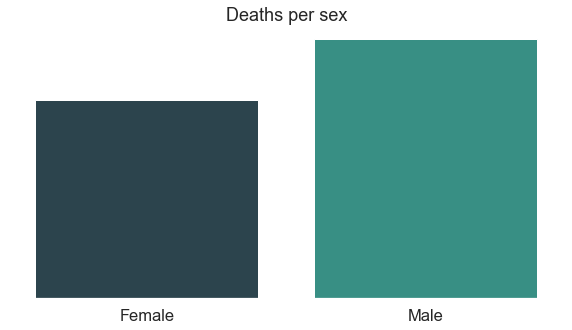

In [67]:
ax = sns.countplot(x='is_male', data=df_merged,palette=bin_palette)
ax.set(xlabel='',title='Deaths per sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female','Male'])

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Deaths per Month (Total)')]

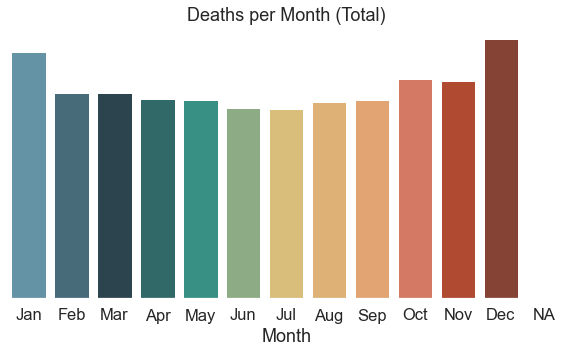

In [68]:
month_values = {
                    1:'Jan',
                    2:'Feb',
                    3:'Mar',
                    4:'Apr',
                    5:'May',
                    6:'Jun',
                    7:'Jul',
                    8:'Aug',
                    9:'Sep',
                    10:'Oct',
                    11:'Nov',
                    12:'Dec',
                    99:'NA'
                    }
import collections
result = collections.OrderedDict(sorted(month_values.items())) #order the month values by key 
ax = sns.countplot(x='month', data=df_merged,order=list(result.values()),palette=mul_palette)
ax.axes.yaxis.set_visible(False)
ax.set(ylabel="Total",xlabel="Month",title='Deaths per Month (Total)')

[Text(0.5, 1.0, 'Top 10 causes of death in 2019 (Mexico)')]

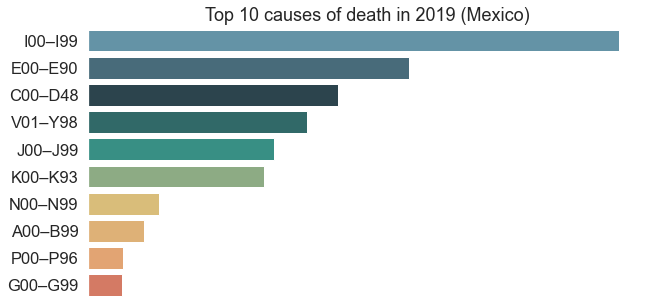

In [69]:
# Plot  top 10 causes of death
ax = sns.countplot(y='icd10_chapter', data=df_merged , order = df_merged['icd10_chapter'].value_counts().iloc[:10].index,palette=mul_palette)
# ADDED: Remove labels.
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('')
ax.set(title='Top 10 causes of death in 2019 (Mexico)')

[Text(0.5, 1.0, 'Top 10 causes of death in 2019 (Mexico)')]

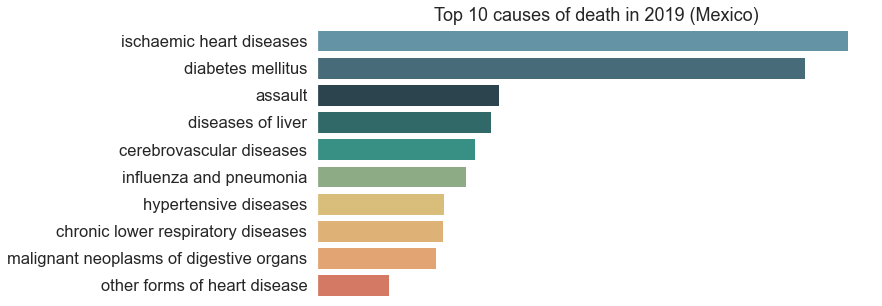

In [70]:
# Plot  top 10 causes of death
ax = sns.countplot(y='icd10_desc', data=df_merged , order = df_merged['icd10_desc'].value_counts().iloc[:10].index,palette=mul_palette)
# ADDED: Remove labels.
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('')
ax.set(title='Top 10 causes of death in 2019 (Mexico)')

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Deaths by employement')]

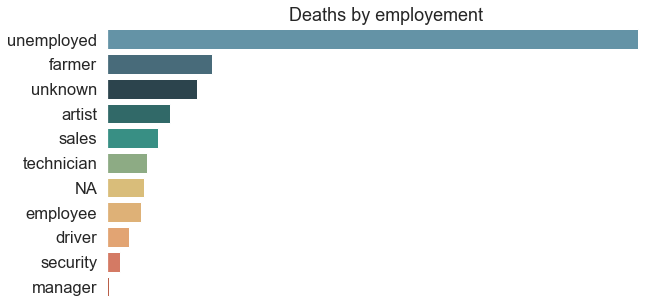

In [71]:
ax = sns.countplot( y='employement', data=df_merged,palette=mul_palette,order = df_merged.employement.value_counts().index)
ax.axes.xaxis.set_visible(False)
ax.set(ylabel="",title='Deaths by employement')

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Deaths by Education Level')]

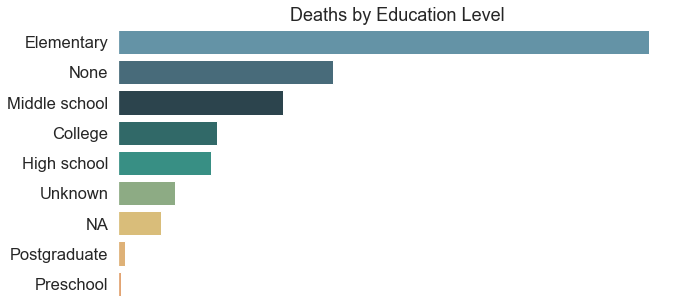

In [72]:
ax = sns.countplot( y='education', data=df_merged,palette=mul_palette,order = df_merged.education.value_counts().index)
ax.axes.xaxis.set_visible(False)
ax.set(ylabel="",title='Deaths by Education Level')

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Deaths by Age Group')]

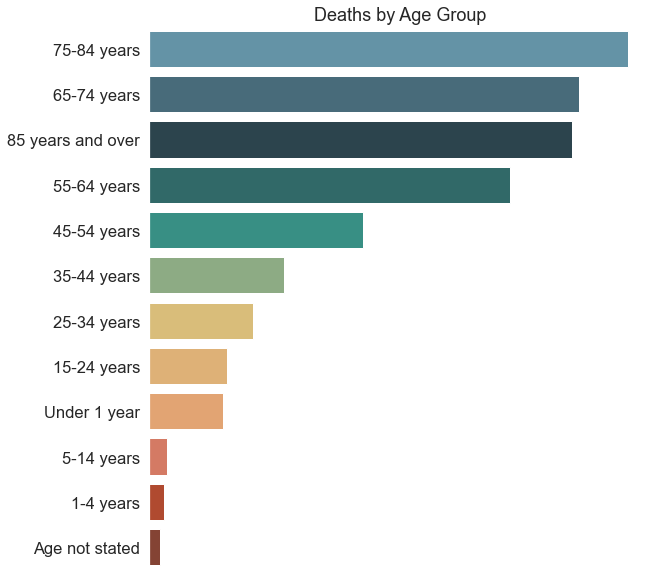

In [73]:
plt.figure(figsize=(9,10))
ax = sns.countplot( y='age_group', data=df_merged,palette=mul_palette,order = df_merged.age_group.value_counts().index)
ax.axes.xaxis.set_visible(False)
ax.set(ylabel="",title='Deaths by Age Group')

Text(0, 0.5, '')

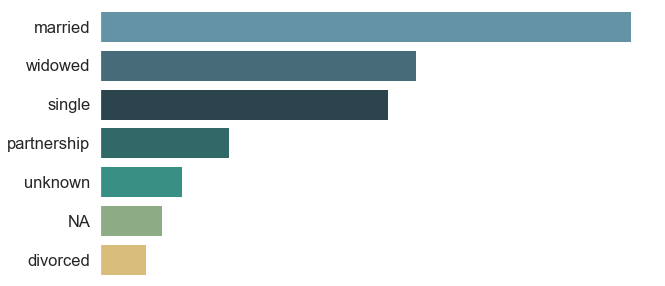

In [74]:
labels = list(df_merged.marital.value_counts().index)
ax = sns.countplot( y='marital', data=df_merged,palette=mul_palette,order = labels)
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('')

Text(0, 0.5, '')

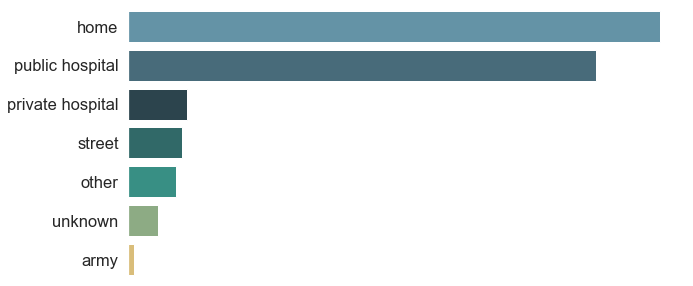

In [75]:

labels = list(df_merged.place_death.value_counts().index)
ax = sns.countplot( y='place_death', data=df_merged,palette=mul_palette,order = labels)
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('')

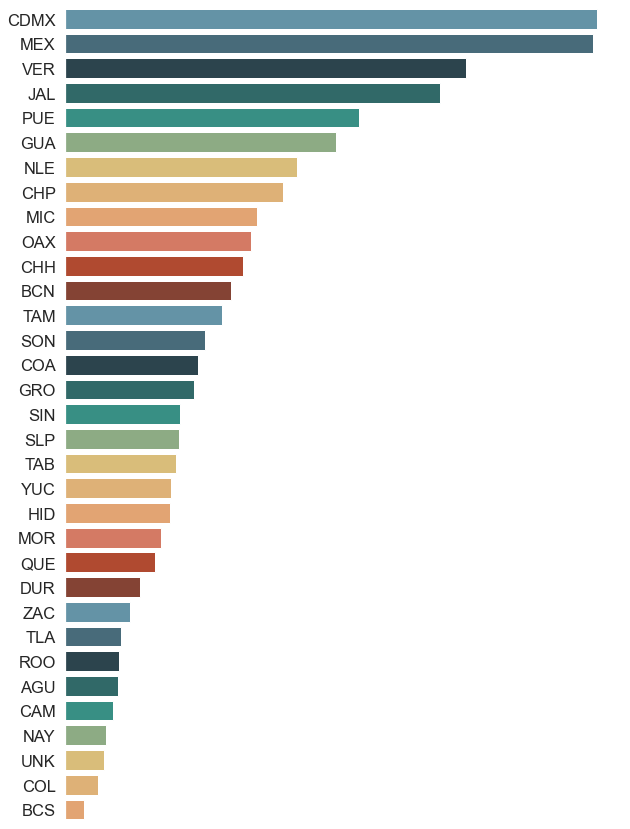

In [76]:
plt.figure(figsize=(10,15))
ax = sns.countplot( y='state_death', data=df_merged,palette=mul_palette,order = df_merged.state_death.value_counts().index,dodge=False)
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('')
plt.show()

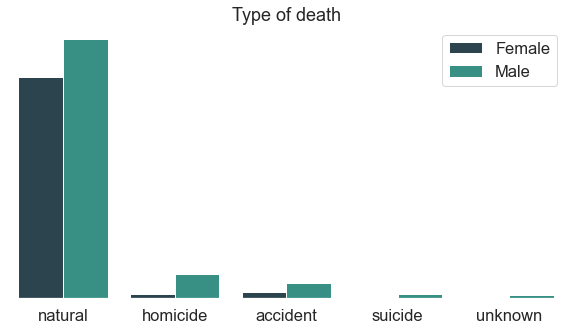

In [77]:
labels = list(df_merged.type_death.value_counts().index)
ax = sns.countplot( x='type_death', hue='is_male',data=df_merged,palette=bin_palette,order = labels)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(False)
ax.set(ylabel = "", xlabel = "",title = 'Type of death')
ax.legend(['Female', 'Male'])
#ax.set_xticklabels(['Personal','Business'])

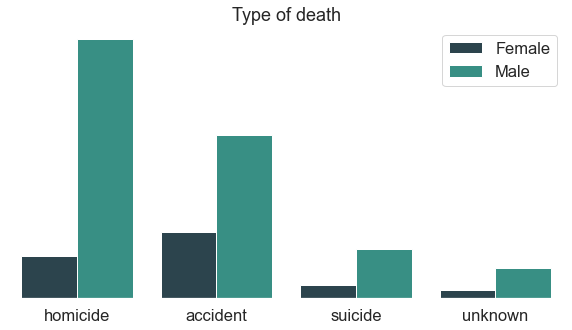

In [78]:
#labels = list(df_merged.type_death.value_counts().index)
labels =list(df_merged.type_death.value_counts().index)
labels.remove('natural')
ax = sns.countplot( x='type_death', hue='is_male',data=df_merged[df_merged.type_death!='natural'],palette=bin_palette,order = labels)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(False)
ax.set(ylabel = "", xlabel = "",title = 'Type of death')
ax.legend(['Female', 'Male'])

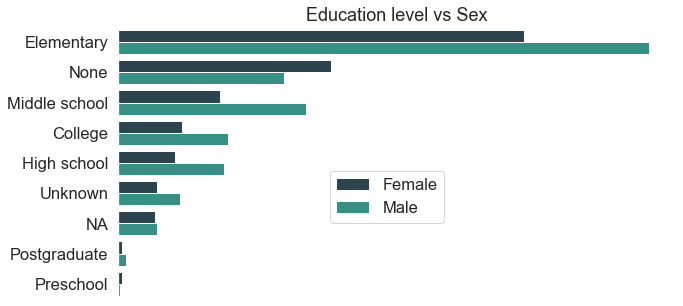

In [79]:
labels = list(df_merged.education.value_counts().index)
ax = sns.countplot( y='education', hue='is_male',data=df_merged,palette=bin_palette,order = labels)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)
ax.set(ylabel = "", xlabel = "",title = 'Education level vs Sex')
ax.legend(['Female', 'Male'],loc='best', bbox_to_anchor=(0.6,0.5))

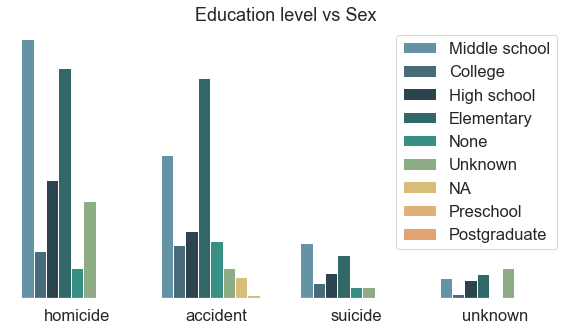

In [80]:
labels =list(df_merged.type_death.value_counts().index)
labels.remove('natural')
ax = sns.countplot( x='type_death', hue='education',data=df_merged[df_merged.type_death!='natural'],palette=mul_palette,order = labels,dodge=True)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(False)
ax.set(ylabel = "", xlabel = "",title = 'Education level vs Sex')
ax.legend(loc='best')

In [81]:
import collections
age_values={ 1: 'Months',
                2: '1 year',
                3: '2 years',
                4: '3 years',
                5: '4 years',
                6: '5 to 9 years',
                7: '10 to 14 years',
                8: '15 to 19 years',
                9: '20 to 24 years',
                10: '25 to 29 years',
                11: '30 to 34 years',
                12: '35 to 39 years',
                13: '40 to 44 years',
                14: '45 to 49 years',
                15: '50 to 54 years',
                16: '55 to 59 years',
                17: '60 to 64 years',
                18: '65 to 69 years',
                19: '70 to 74 years',
                20: '75 to 79 years',
                21: '80 to 84 years',
                22: '85 to 89 years',
                23: '90 to 94 years',
                24: '95 to 99 years',
                25: '100 a 104 years',
                26: '105 a 109 years',
                27: '110 a 114 years',
                28: '115 a 119 years',
                29: '120 years',
                30: 'Unknown'}

result = collections.OrderedDict(sorted(age_values.items())) #order the month values by key 
age_order = list(result.values())
age_order_index = list(result.keys())

In [82]:
import collections
age_values={ 
                1: 'Under 1 year',
                2: '1-4 years',
                3: '5-14 years',
                4: '15-24 years',
                5: '25-34 years',
                6: '35-44 years',
                7: '45-54 years',
                8: '55-64 years',
                9: '65-74 years',
                10: '75-84 years',
                11: '85 years and over',
                12: 'Age not stated'
            }

result = collections.OrderedDict(sorted(age_values.items())) #order the month values by key 
age_order = list(result.values())
age_order_index = list(result.keys())

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

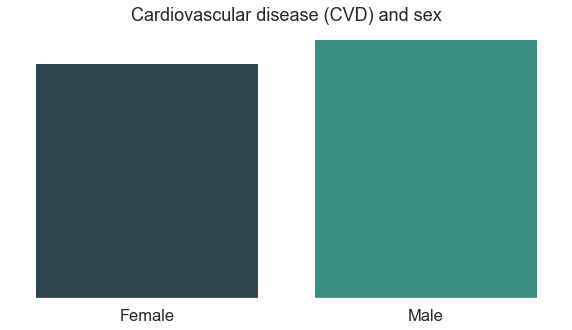

In [83]:
ax = sns.countplot( x='is_male',data=df_merged[df_merged.is_CVD==True],palette=bin_palette)
ax.set(xlabel="",title='Cardiovascular disease (CVD) and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

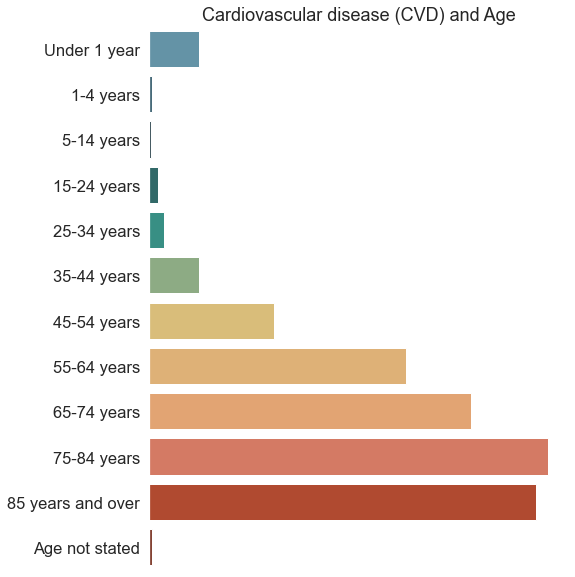

In [84]:
data = df_merged[df_merged.is_CVD==True]
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Cardiovascular disease (CVD) and Age')
ax.axes.xaxis.set_visible(False)
#ax.set_xticklabels(['Female', 'Male'])

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

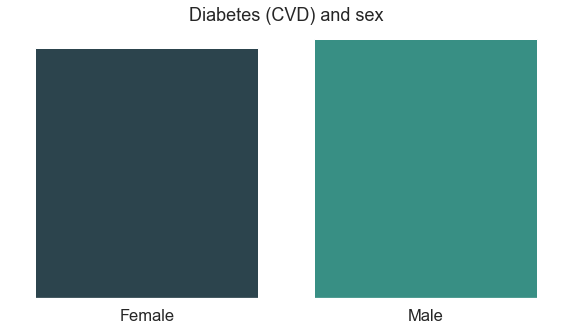

In [85]:
data = df_merged[df_merged.is_diabetes==True]
ax = sns.countplot( x='is_male',data=data,palette=bin_palette)
ax.set(xlabel="",title='Diabetes (CVD) and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

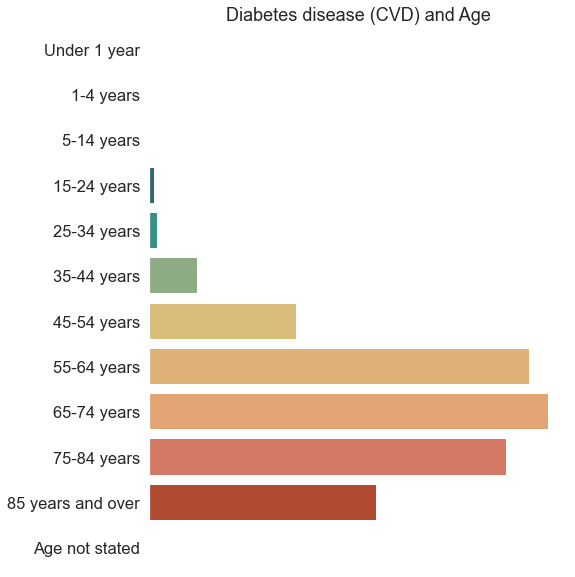

In [86]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Diabetes disease (CVD) and Age')
ax.axes.xaxis.set_visible(False)
#ax.set_xticklabels(['Female', 'Male'])

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

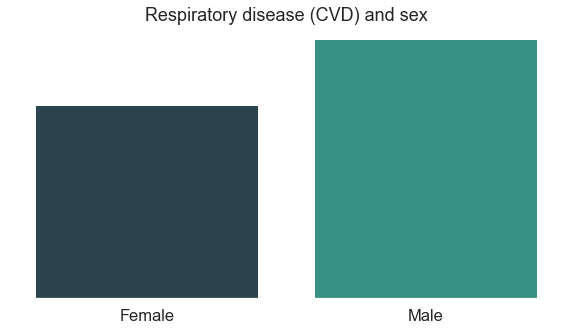

In [87]:
data = df_merged[df_merged.is_respiratory==True]
ax = sns.countplot( x='is_male',data=data,palette=bin_palette)
ax.set(xlabel="",title='Respiratory disease (CVD) and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

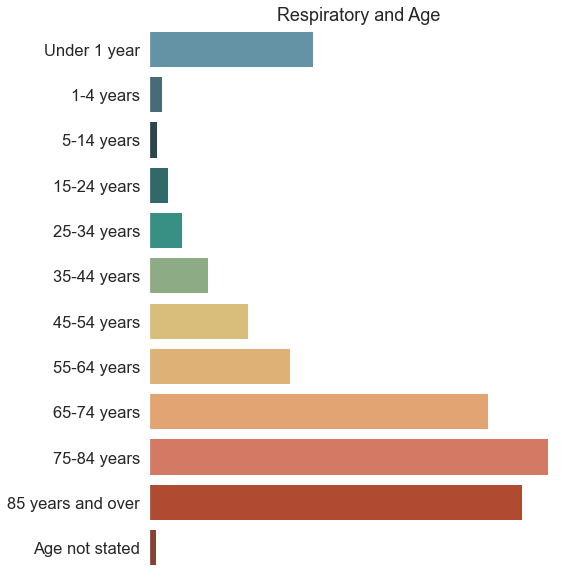

In [88]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Respiratory and Age')
ax.axes.xaxis.set_visible(False)

In [89]:
df_merged.head()

,_id,icd10_code,capitulo,grupo,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death,icd10_group,icd10_desc,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria,icd10_chapter
0,6086e5eb9a3528d53593bb7f,I61,9,7,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
1,6086e5eb9a3528d53593bb83,I64,9,7,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
2,6086e5eb9a3528d53593bbab,I61,9,7,Feb,55-64 years,Elementary,farmer,single,VER,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
3,6086e5eb9a3528d53593bbcf,I67,9,7,May,65-74 years,Elementary,unemployed,married,MEX,natural,female,False,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
4,6086e5eb9a3528d53593bbf3,I64,9,7,Feb,75-84 years,Unknown,unemployed,married,CAM,natural,female,False,False,False,False,home,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

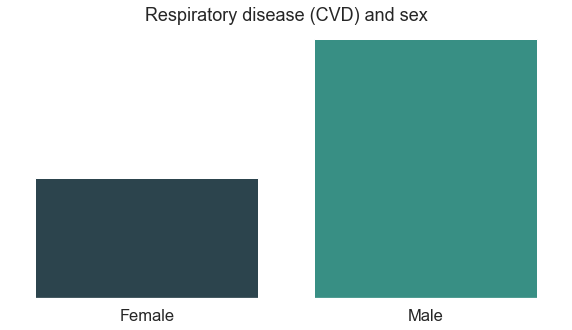

In [90]:
data = df_merged[df_merged.is_accident==True]
ax = sns.countplot( x='is_male',data=data,palette=bin_palette)
ax.set(xlabel="",title='Respiratory disease (CVD) and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

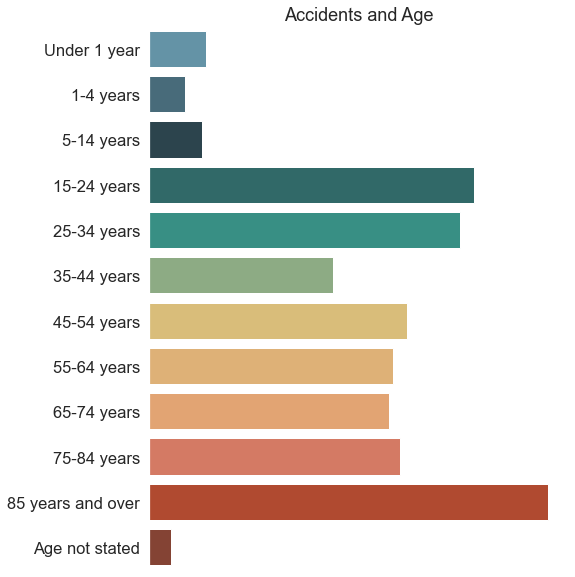

In [91]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Accidents and Age')
ax.axes.xaxis.set_visible(False)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

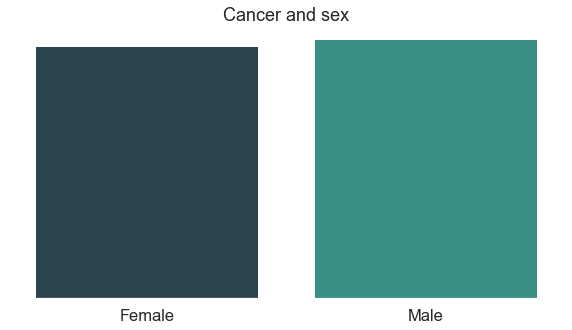

In [92]:
data = df_merged[df_merged.is_cancer==True]
ax = sns.countplot( x='is_male',data=data,palette=bin_palette)
ax.set(xlabel="",title='Cancer and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

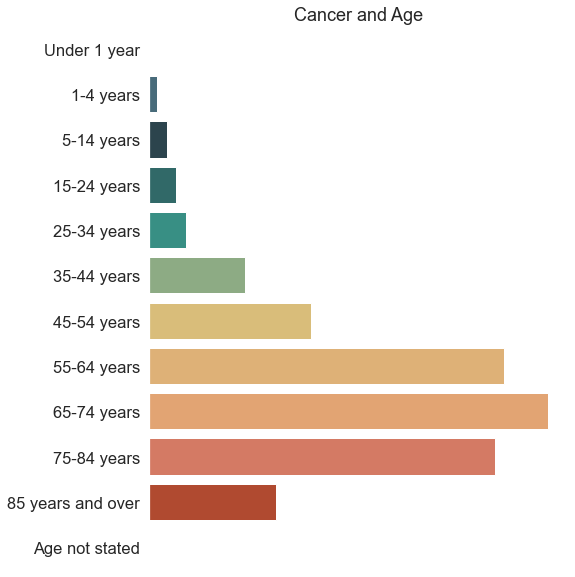

In [93]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Cancer and Age')
ax.axes.xaxis.set_visible(False)

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

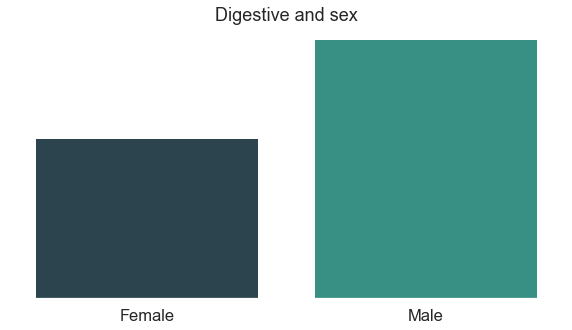

In [94]:
data = df_merged[df_merged.is_digestive==True]
ax = sns.countplot( x='is_male',data=data,palette=bin_palette)
ax.set(xlabel="",title='Digestive and sex')
ax.axes.yaxis.set_visible(False)
ax.set_xticklabels(['Female', 'Male'])

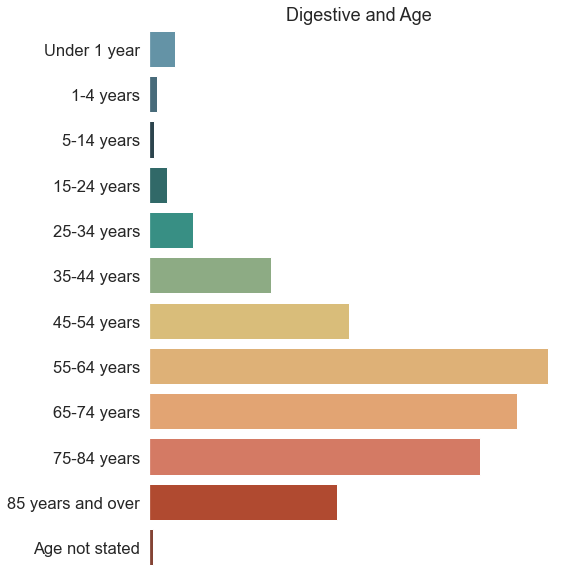

In [95]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Digestive and Age')
ax.axes.xaxis.set_visible(False)

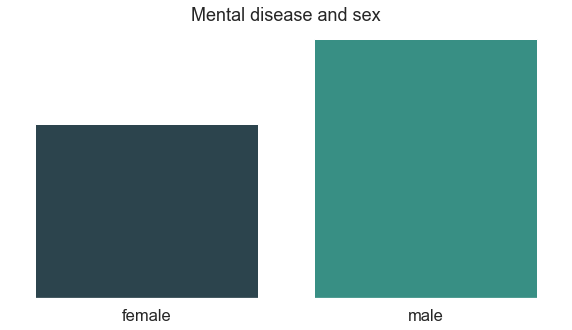

In [106]:
data = df_merged[df_merged.is_mental==True]
ax = sns.countplot( x='sex',data=data,palette=bin_palette)
ax.set(xlabel="",title='Mental disease and sex')
ax.axes.yaxis.set_visible(False)
#ax.set_xticklabels(['Female', 'Male'])

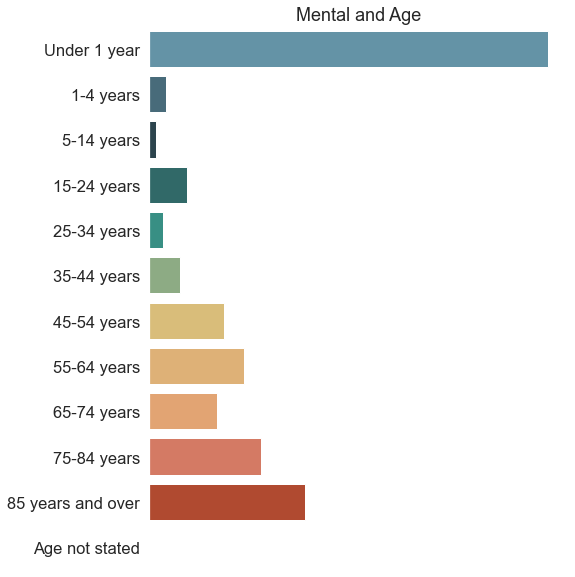

In [97]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Mental and Age')
ax.axes.xaxis.set_visible(False)

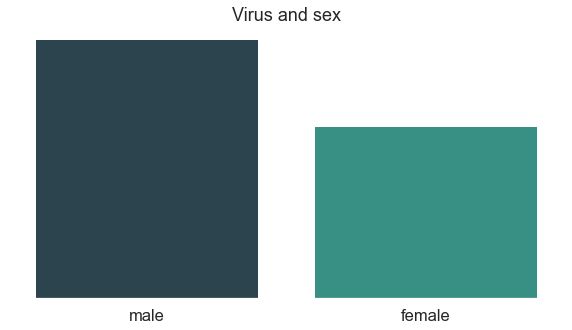

In [105]:
data = df_merged[df_merged.is_virus==True]
ax = sns.countplot( x='sex',data=data,palette=bin_palette)
ax.set(xlabel="",title='Virus and sex')
ax.axes.yaxis.set_visible(False)
#ax.set_xticklabels(['Female', 'Male'])

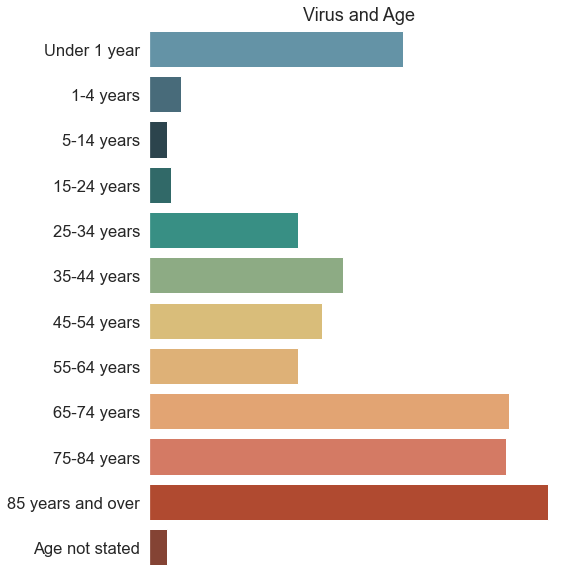

In [99]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Virus and Age')
ax.axes.xaxis.set_visible(False)

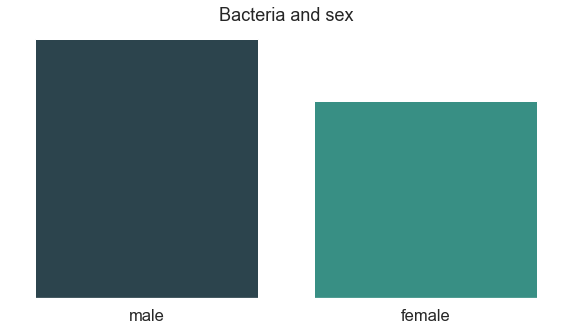

In [104]:
data = df_merged[df_merged.is_bacteria==True]
ax = sns.countplot( x='sex',data=data,palette=bin_palette)
ax.set(xlabel="",title='Bacteria and sex')
ax.axes.yaxis.set_visible(False)
#ax.set_xticklabels(['Female', 'Male'])

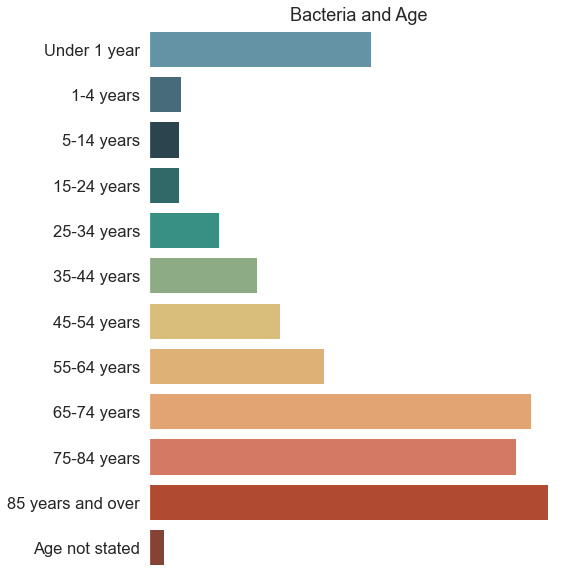

In [101]:
plt.figure(figsize=(7.5,10))
ax = sns.countplot( y = 'age_group',data=data,palette=mul_palette,order=age_order)
ax.set(ylabel="",title='Bacteria and Age')
ax.axes.xaxis.set_visible(False)

In [108]:
# list of death cause categories
cause_columns = list(df_merged.columns[19:30])
cause_columns

['is_accident',
 'is_cancer',
 'is_CVD',
 'is_diabetes',
 'is_digestive',
 'is_mental',
 'is_pregnancy',
 'is_respiratory',
 'is_virus',
 'is_suicide',
 'is_bacteria']

In [109]:
#Group death categories by state
deaths_state = df_merged.groupby(by=["state_death"]).sum()[cause_columns]
deaths_state['total'] = deaths_state.sum(axis=1)
#deaths_state.reset_index(inplace=True)
deaths_state = deaths_state.sort_values('total',ascending=True)
deaths_state.head(10)    

,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria,total
state_death,,,,,,,,,,,,
BCS,0,1,18,5,12,1,0,3,2,0,1,43
COL,7,5,28,2,5,1,1,7,3,3,4,66
UNK,5,3,30,4,1,2,1,10,6,0,6,68
NAY,8,12,28,8,13,3,0,13,4,3,4,96
AGU,9,14,42,18,4,2,1,17,6,0,5,118
CAM,13,14,36,7,7,5,3,13,11,3,8,120
TLA,4,24,38,18,15,3,4,8,4,0,2,120
ZAC,16,21,37,9,20,3,2,12,0,2,3,125
ROO,13,12,28,13,15,2,1,19,11,4,14,132


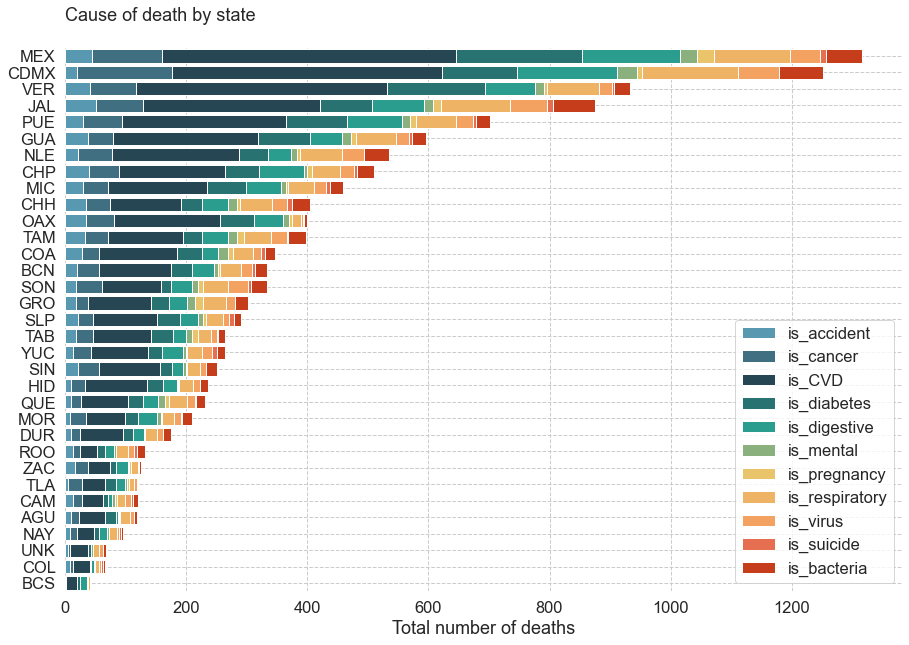

In [110]:
fields =  cause_columns
labels = cause_columns
#custom_colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153", '#902C14']
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
fig, ax = plt.subplots(1, figsize=(15, 10))
# plot bars
left = len(deaths_state) * [0]
for idx, name in enumerate(fields):
    plt.barh(deaths_state.index, deaths_state[name], left = left, color=custom_colors[idx])
    left = left + deaths_state[name]
# title, legend, labels
plt.title('Cause of death by state\n', loc='left')
plt.legend(labels,ncol=1, loc="lower right", frameon=True)

plt.xlabel('Total number of deaths')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [111]:
# Group cause of death by state
deaths_state = df_merged.groupby(by=["state_death"]).sum()[cause_columns]
df_transposed = deaths_state.T #transponse the dataframe
df_transposed.head(20)

state_death,AGU,BCN,BCS,CAM,CDMX,CHH,CHP,COA,COL,DUR,GRO,GUA,HID,JAL,MEX,MIC,MOR,NAY,NLE,OAX,PUE,QUE,ROO,SIN,SLP,SON,TAB,TAM,TLA,UNK,VER,YUC,ZAC
is_accident,9,19,0,13,19,34,39,27,7,9,18,37,9,51,44,29,7,8,21,34,29,9,13,21,21,18,17,33,4,5,40,13,16
is_cancer,14,36,1,14,157,40,50,29,5,15,20,41,23,78,115,42,27,12,56,46,65,17,12,34,24,43,29,38,24,3,76,30,21
is_CVD,42,119,18,36,446,117,174,128,28,71,103,241,103,292,486,163,65,28,210,175,271,78,28,101,107,97,95,123,38,30,415,93,37
is_diabetes,18,35,5,7,125,35,57,42,2,16,31,85,27,85,208,65,21,8,48,57,100,24,13,20,38,17,37,32,18,4,162,23,9
is_digestive,4,36,12,7,164,42,74,26,5,19,29,53,22,86,163,58,32,13,38,47,91,25,15,18,30,35,21,43,15,1,83,36,20
is_mental,2,8,1,5,33,16,6,17,1,1,13,15,2,15,27,8,6,3,9,10,13,12,2,5,7,10,10,14,3,2,15,4,3
is_pregnancy,1,3,0,3,8,5,7,8,1,1,13,8,1,13,28,3,2,0,5,6,11,7,1,2,5,7,10,12,4,1,4,2,2
is_respiratory,17,34,3,13,160,53,47,33,7,20,38,66,24,115,126,43,20,13,70,14,66,29,19,21,28,42,21,45,8,10,86,24,12
is_virus,6,18,2,11,67,24,23,14,3,9,16,21,12,60,50,19,11,4,37,3,27,13,11,10,11,32,10,27,4,6,22,18,0
is_suicide,0,5,0,3,0,8,5,6,3,1,0,6,0,11,10,8,2,3,0,2,6,2,4,1,7,6,2,1,0,0,3,7,2


In [112]:
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head(10)

,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
AGU,7.627,11.864,35.593,15.254,3.390,1.695,0.847,14.407,5.085,0.000,4.237
BCN,5.689,10.778,35.629,10.479,10.778,2.395,0.898,10.180,5.389,1.497,6.287
BCS,0.000,2.326,41.860,11.628,27.907,2.326,0.000,6.977,4.651,0.000,2.326
CAM,10.833,11.667,30.000,5.833,5.833,4.167,2.500,10.833,9.167,2.500,6.667
CDMX,1.518,12.540,35.623,9.984,13.099,2.636,0.639,12.780,5.351,0.000,5.831
CHH,8.395,9.877,28.889,8.642,10.370,3.951,1.235,13.086,5.926,1.975,7.654
CHP,7.647,9.804,34.118,11.176,14.510,1.176,1.373,9.216,4.510,0.980,5.490
COA,7.781,8.357,36.888,12.104,7.493,4.899,2.305,9.510,4.035,1.729,4.899
COL,10.606,7.576,42.424,3.030,7.576,1.515,1.515,10.606,4.545,4.545,6.061
DUR,5.143,8.571,40.571,9.143,10.857,0.571,0.571,11.429,5.143,0.571,7.429


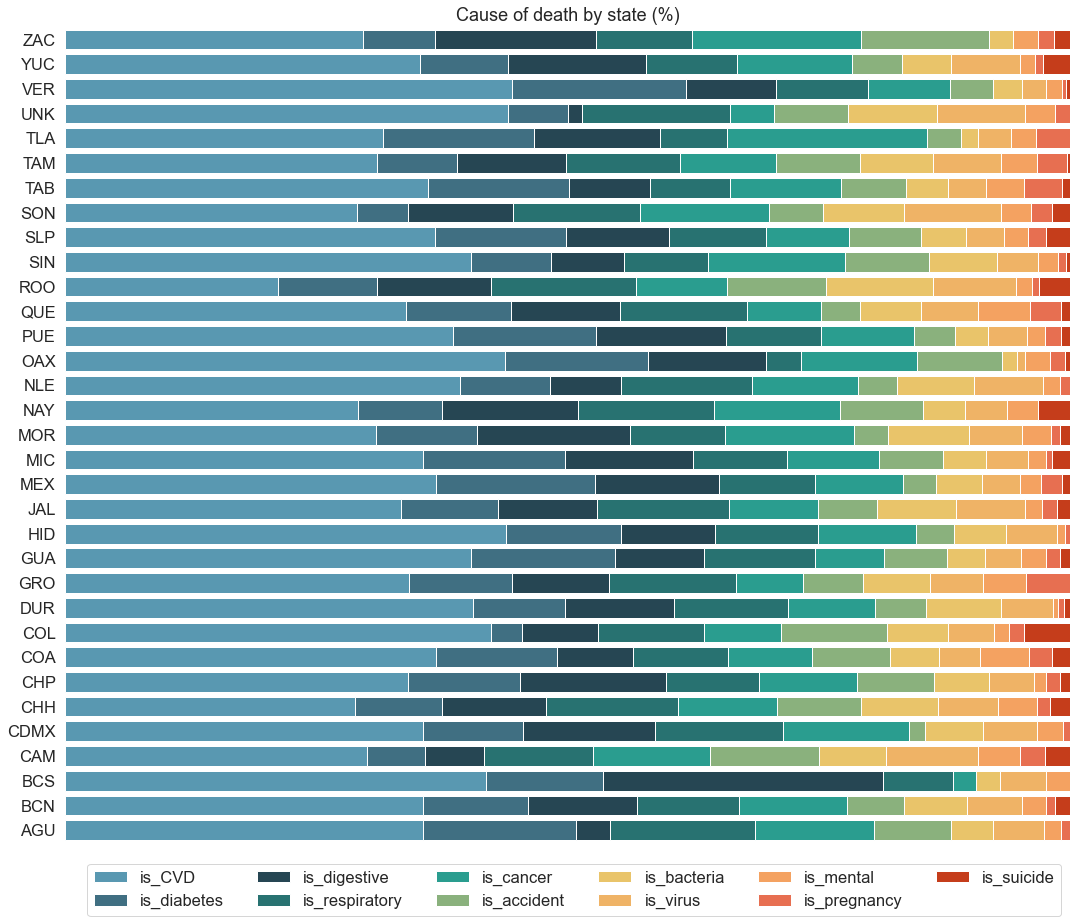

In [113]:
fields =  list(df_transposed.sum(axis=1).sort_values(ascending=False).index)
#custom_colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153", '#902C14']
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()
labels = fields

fig, ax = plt.subplots(1, figsize=(18, 15))
# plot bars
left = len(df_normalized) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_normalized.index, df_normalized[name], left = left, color=custom_colors[idx])
    left = left + df_normalized[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by state (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=6, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.1))
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()

Categories by Age

In [114]:
# Group cause of death by Age
deaths_age = df_merged.groupby(by=["age_group"]).sum()[cause_columns]
df_transposed = deaths_age.T #transponse the dataframe
age_order.reverse()
df_transposed = df_transposed.reindex(columns=age_order)
df_transposed = df_transposed.dropna(axis='columns')

In [115]:
# Group cause of death by Age
#deaths_age = df_merged.groupby(by=["age_group"]).sum()[cause_columns]
#df_transposed = deaths_age.T
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head()

,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
Age not stated,19.355,0.000,19.355,0.000,9.677,0.000,0.000,16.129,16.129,3.226,16.129
85 years and over,4.985,4.411,48.125,9.396,6.617,2.029,0.176,13.233,4.985,0.000,6.043
75-84 years,2.679,10.264,42.415,12.642,9.962,1.245,0.113,12.113,3.811,0.000,4.755
65-74 years,2.729,12.600,36.437,15.048,11.758,0.803,0.040,10.955,4.093,0.281,5.257
55-64 years,3.459,13.985,36.241,17.895,15.940,1.404,0.000,5.664,2.105,0.301,3.008


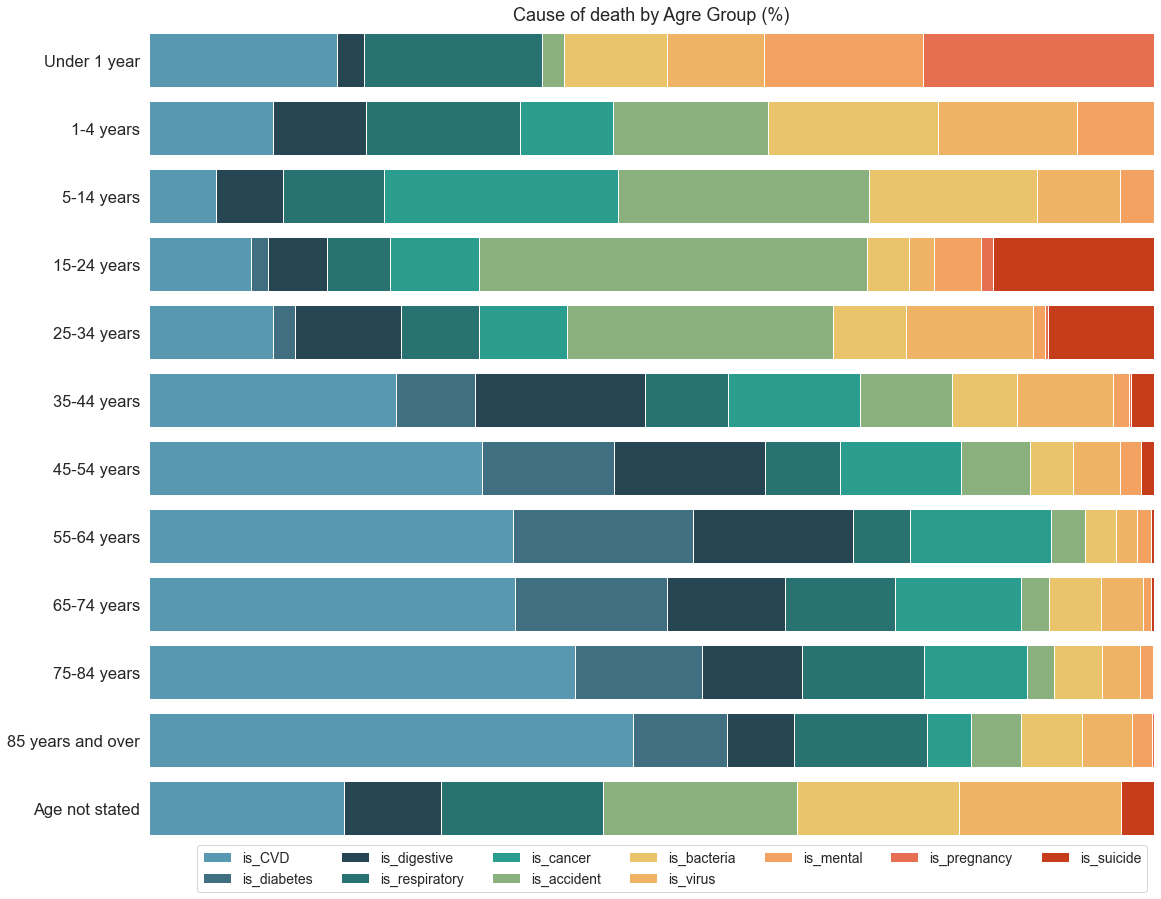

In [116]:
fields =  list(df_transposed.sum(axis=1).sort_values(ascending=False).index)
#custom_colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153", '#902C14']
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()
labels = fields

fig, ax = plt.subplots(1, figsize=(18, 15))
# plot bars
left = len(df_normalized) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_normalized.index, df_normalized[name], left = left, color=custom_colors[idx])
    left = left + df_normalized[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by Agre Group (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=7, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.07),fontsize=14)
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()

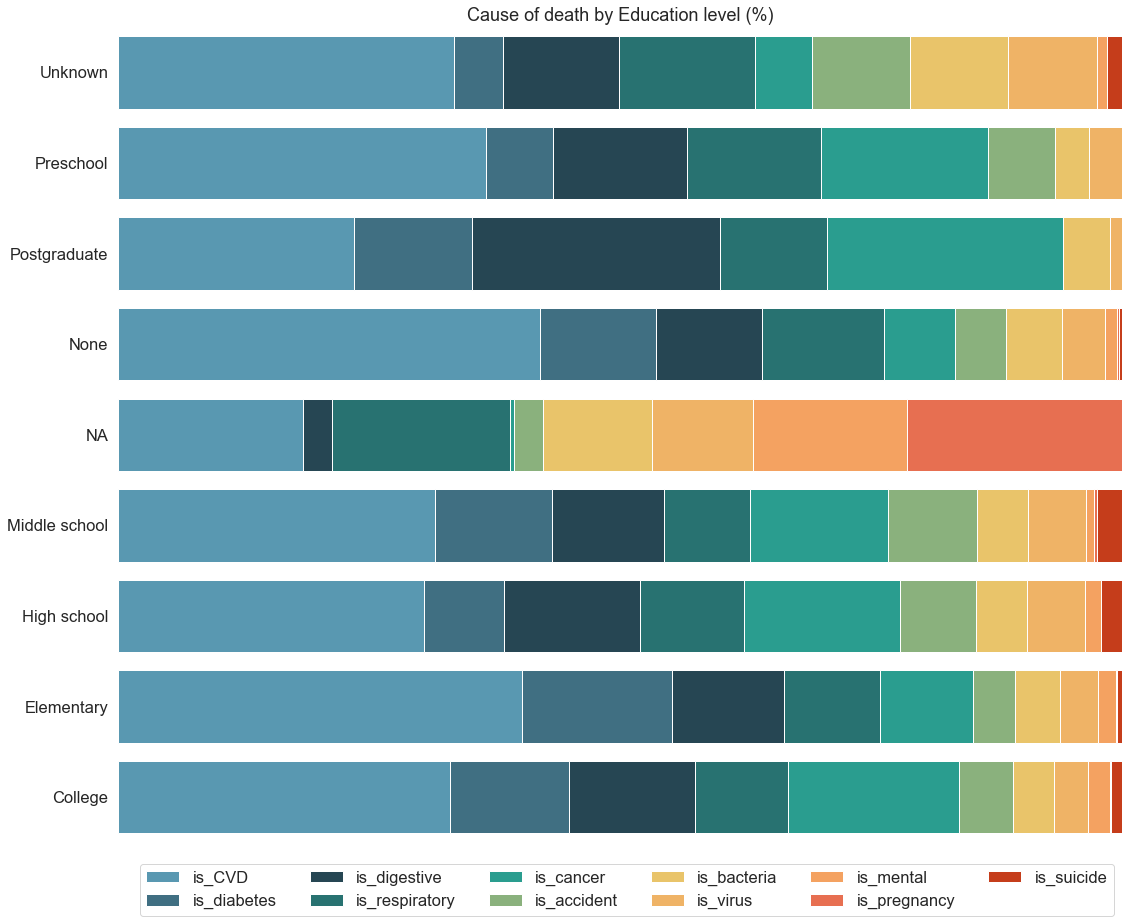

In [117]:
# Group cause of death by education
deaths_education = df_merged.groupby(by=["education"]).sum()[cause_columns]
df_transposed = deaths_education.T #transponse the dataframe
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head(10)
fields =  list(df_transposed.sum(axis=1).sort_values(ascending=False).index)
#custom_colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153", '#902C14']
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()
labels = fields

fig, ax = plt.subplots(1, figsize=(18, 15))
# plot bars
left = len(df_normalized) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_normalized.index, df_normalized[name], left = left, color=custom_colors[idx])
    left = left + df_normalized[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by Education level (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=6, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.1))
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()

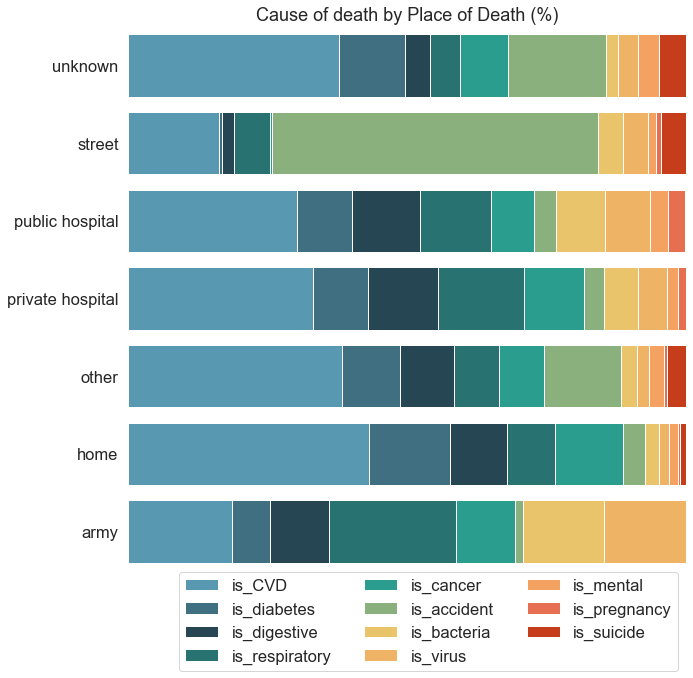

In [118]:
# Group cause of death by education
deaths_education = df_merged.groupby(by=["place_death"]).sum()[cause_columns]
df_transposed = deaths_education.T #transponse the dataframe
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head(10)
fields =  list(df_transposed.sum(axis=1).sort_values(ascending=False).index)
#custom_colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153", '#902C14']
custom_colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#custom_colors.reverse()
labels = fields

fig, ax = plt.subplots(1, figsize=(10, 10))
# plot bars
left = len(df_normalized) * [0]
for idx, name in enumerate(fields):
    rects = plt.barh(df_normalized.index, df_normalized[name], left = left, color=custom_colors[idx])
    left = left + df_normalized[name]
    text_color = 'darkgrey'
# title, legend, labels
plt.title('Cause of death by Place of Death (%)', loc='center')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
#plt.legend(labels,ncol=len(labels), bbox_to_anchor = (0, 1), frameon=True,loc='lower left', fontsize='small')
plt.legend(labels,ncol=3, loc="lower right", frameon=True,bbox_to_anchor = (1, -0.2))
#plt.legend(labels, bbox_to_anchor = (1, 1))
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
ax.axes.xaxis.set_visible(False)
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
plt.show()

In [119]:
# Group cause of death by education
deaths_education = df_merged.groupby(by=["place_death"]).sum()[cause_columns]
df_transposed = deaths_education.T #transponse the dataframe
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head(10)

,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
army,1.333,10.667,18.667,6.667,10.667,0.000,0.000,22.667,14.667,0.000,14.667
home,3.935,12.293,43.200,14.435,10.273,1.619,0.261,8.497,1.881,1.184,2.420
other,13.692,8.068,38.386,10.269,9.780,2.689,0.489,8.068,2.200,3.423,2.934
private hospital,3.583,10.748,33.178,9.813,12.617,2.025,1.402,15.265,5.140,0.000,6.231
public hospital,3.835,7.728,30.314,9.790,12.122,3.276,3.006,12.816,8.133,0.212,8.769
street,58.371,0.452,16.290,0.452,2.262,1.357,0.905,6.335,4.525,4.525,4.525
unknown,17.568,8.559,37.838,11.712,4.505,3.604,0.000,5.405,3.604,4.955,2.252


In [120]:
list(df_transposed.sum(axis=1).sort_values(ascending=False).index)

['is_CVD',
 'is_diabetes',
 'is_digestive',
 'is_respiratory',
 'is_cancer',
 'is_accident',
 'is_bacteria',
 'is_virus',
 'is_mental',
 'is_pregnancy',
 'is_suicide']

In [121]:
# Group cause of death by education
deaths_place = df_merged.groupby(by=["icd10_chapter"]).sum()
df_transposed = deaths_place.T #transponse the dataframe
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()

df_normalized.head(10)

""


# Save processed data to PostgreSQL
- DB Engine: PostgreSQL
- DB Version: 11.11
- Infraestructure: Microsoft AZURE
- Location: West Europe
- VM Size: Standard 
- OS: Linux (debian 10.9)
- vCPU: 1 vcpus
- Memory: 1 GiB
- Storage: 30 GB
# DB Confogguration variables:
- DB_SERVER = 'ncirl-az01.westeurope.cloudapp.azure.com'
- DB_PORT   =  5432
- DB_NAME   = 'remotedap'
- DB_USER   = 'remotedap2'
- DB_PWD    = 'Hola1234'

In [122]:
# Group cause of death by education
deaths_place = df_merged.groupby(by=["place_death"]).sum()[cause_columns]
df_transposed = deaths_place.T #transponse the dataframe
#Normalize data using lambda
col_order = {}
df_normalized= pd.DataFrame()
for col in list(df_transposed.columns):
    #print('col: {} total {}'.format(col,df_transposed[col].sum()))
    total = float(df_transposed[col].sum())
    col_order[col] = total #calculate the total deathc by the state
    df_normalized[col] = df_transposed[col].apply(lambda x:  (x / total)*100  ) #calculate the category death proportion
df_normalized =  df_normalized.T #transponde the normalized data frame
df_normalized.head(10)

,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
army,1.333,10.667,18.667,6.667,10.667,0.000,0.000,22.667,14.667,0.000,14.667
home,3.935,12.293,43.200,14.435,10.273,1.619,0.261,8.497,1.881,1.184,2.420
other,13.692,8.068,38.386,10.269,9.780,2.689,0.489,8.068,2.200,3.423,2.934
private hospital,3.583,10.748,33.178,9.813,12.617,2.025,1.402,15.265,5.140,0.000,6.231
public hospital,3.835,7.728,30.314,9.790,12.122,3.276,3.006,12.816,8.133,0.212,8.769
street,58.371,0.452,16.290,0.452,2.262,1.357,0.905,6.335,4.525,4.525,4.525
unknown,17.568,8.559,37.838,11.712,4.505,3.604,0.000,5.405,3.604,4.955,2.252


In [123]:
# Review the data set before uploading to SQL DB2
df_mex_mort = df_merged.drop(['_id','grupo'],axis='columns')
df_mex_mort.rename(columns = {'capitulo':'icd10_block'}, inplace = True) #Rename columns to match the final data frame

In [124]:
df_mex_mort.head()

,icd10_code,icd10_block,month,age_group,education,employement,marital,state_death,type_death,sex,is_male,is_work_related,is_foreign,is_pregnant,place_death,icd10_group,icd10_desc,is_accident,is_cancer,is_CVD,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria,icd10_chapter
0,I61,9,Jan,55-64 years,Elementary,farmer,partnership,QUE,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
1,I64,9,Jan,75-84 years,None,farmer,married,GUA,natural,male,True,False,False,False,private hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
2,I61,9,Feb,55-64 years,Elementary,farmer,single,VER,natural,male,True,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
3,I67,9,May,65-74 years,Elementary,unemployed,married,MEX,natural,female,False,False,False,False,public hospital,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99
4,I64,9,Feb,75-84 years,Unknown,unemployed,married,CAM,natural,female,False,False,False,False,home,I60-I69,cerebrovascular diseases,False,False,True,False,False,False,False,False,False,False,False,I00–I99


In [125]:
# Create the table, drop if exist
postgresql.createTable('mex_mort',drop_table=True)

[04/26/2021-17:18:58]: Connecting to PostgeSQL ...
[04/26/2021-17:18:58]: WARNING: Dropping table mex_mort !!!
[04/26/2021-17:18:58]: NOTICE: Creating table mex_mort ...
[04/26/2021-17:18:58]: Closing DB connection...


In [126]:
# Use function to upload a data frame into a SQL table
postgresql.uploadDataFrame(df_mex_mort,'mex_mort')

[04/26/2021-17:18:59]: Connecting to PostgeSQL ...
[04/26/2021-17:18:59]: NOTICE: Inserting 10469 into table mex_mort...
[04/26/2021-17:19:06]: OK: Finish inserting - processed batches: 69
[04/26/2021-17:19:06]: Closing DB connection...


# The End